In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score



In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dissertation EA6/pvr_2020-01-03_379d.csv")

In [ ]:
df['Flag Text'].unique()

array([nan, 'Holiday'], dtype=object)

In [ ]:
df.var

<bound method NDFrame._add_numeric_operations.<locals>.var of                      Sdate            Cosit  LaneNumber LaneDescription  \
0      2020-01-03 00:00:00  ="MAC030004006"           1       Channel 1   
1      2020-01-03 00:00:00  ="MAC030004006"           2       Channel 2   
2      2020-01-03 01:00:00  ="MAC030004006"           1       Channel 1   
3      2020-01-03 01:00:00  ="MAC030004006"           2       Channel 2   
4      2020-01-03 02:00:00  ="MAC030004006"           1       Channel 1   
...                    ...              ...         ...             ...   
18161  2021-01-15 10:00:00  ="MAC030004006"           2       Channel 2   
18162  2021-01-15 11:00:00  ="MAC030004006"           1       Channel 1   
18163  2021-01-15 11:00:00  ="MAC030004006"           2       Channel 2   
18164  2021-01-15 12:00:00  ="MAC030004006"           1       Channel 1   
18165  2021-01-15 12:00:00  ="MAC030004006"           2       Channel 2   

       LaneDirection DirectionDescrip

In [ ]:
df.shape

(18166, 11)

In [ ]:
#missing values in df
print('missing data in df is ', df.isna().values.sum(), 'missing values')


missing data in df is  54114 missing values


In [ ]:
df.isna().sum()

Sdate                       0
Cosit                       0
LaneNumber                  0
LaneDescription             0
LaneDirection               0
DirectionDescription        0
Volume                      0
Flags                       0
Flag Text               17782
AvgSpeed                18166
PmlHGV                  18166
dtype: int64

In [ ]:
df.nunique()


Sdate                   9083
Cosit                      1
LaneNumber                 2
LaneDescription            2
LaneDirection              1
DirectionDescription       1
Volume                  1048
Flags                      2
Flag Text                  1
AvgSpeed                   0
PmlHGV                     0
dtype: int64

In [ ]:
#change the date type to datetime format
print('the type of all columns ', df.dtypes)
df['Sdate']=pd.to_datetime(df['Sdate'])

the type of all columns  Sdate                    object
Cosit                    object
LaneNumber                int64
LaneDescription          object
LaneDirection             int64
DirectionDescription     object
Volume                    int64
Flags                     int64
Flag Text                object
AvgSpeed                float64
PmlHGV                  float64
dtype: object


In [ ]:
df.dtypes

Sdate                   datetime64[ns]
Cosit                           object
LaneNumber                       int64
LaneDescription                 object
LaneDirection                    int64
DirectionDescription            object
Volume                           int64
Flags                            int64
Flag Text                       object
AvgSpeed                       float64
PmlHGV                         float64
dtype: object

In [ ]:
df['Sdate']

0       2020-01-03 00:00:00
1       2020-01-03 00:00:00
2       2020-01-03 01:00:00
3       2020-01-03 01:00:00
4       2020-01-03 02:00:00
                ...        
18161   2021-01-15 10:00:00
18162   2021-01-15 11:00:00
18163   2021-01-15 11:00:00
18164   2021-01-15 12:00:00
18165   2021-01-15 12:00:00
Name: Sdate, Length: 18166, dtype: datetime64[ns]

In [ ]:
df['PmlHGV'].unique()

array([nan])

No data for whole column on avg speed and pmlHGV which stands for Percentage of multilane Heavy goods vehicle (PmlHGV).


In [ ]:
df['Cosit'].unique()
#There is also only one value in cosit, so abandon

array(['="MAC030004006"'], dtype=object)

In [ ]:
#extract the date out of the 'sdate' column
df['date']= df['Sdate'].dt.date

In [ ]:
df['date']

0        2020-01-03
1        2020-01-03
2        2020-01-03
3        2020-01-03
4        2020-01-03
            ...    
18161    2021-01-15
18162    2021-01-15
18163    2021-01-15
18164    2021-01-15
18165    2021-01-15
Name: date, Length: 18166, dtype: object

In [ ]:
#Change the 'date' column to date time type
df['date']=pd.to_datetime(df['date'])
df['date']

0       2020-01-03
1       2020-01-03
2       2020-01-03
3       2020-01-03
4       2020-01-03
           ...    
18161   2021-01-15
18162   2021-01-15
18163   2021-01-15
18164   2021-01-15
18165   2021-01-15
Name: date, Length: 18166, dtype: datetime64[ns]

In [ ]:
df['Flag Text'].unique()

array([nan, 'Holiday'], dtype=object)

In [ ]:
df[df['Flag Text']=='Holiday']

,Sdate,Cosit,LaneNumber,LaneDescription,LaneDirection,DirectionDescription,Volume,Flags,Flag Text,AvgSpeed,PmlHGV,date
4700,2020-04-10 00:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,73,16,Holiday,NaN,NaN,2020-04-10
4701,2020-04-10 00:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,16,Holiday,NaN,NaN,2020-04-10
4702,2020-04-10 01:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,48,16,Holiday,NaN,NaN,2020-04-10
4703,2020-04-10 01:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,16,Holiday,NaN,NaN,2020-04-10
4704,2020-04-10 02:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,50,16,Holiday,NaN,NaN,2020-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...
17511,2021-01-01 21:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,16,Holiday,NaN,NaN,2021-01-01
17512,2021-01-01 22:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,238,16,Holiday,NaN,NaN,2021-01-01
17513,2021-01-01 22:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,16,Holiday,NaN,NaN,2021-01-01
17514,2021-01-01 23:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,227,16,Holiday,NaN,NaN,2021-01-01


DROPPING THE AVG SPEED AND PMLHGV COLUMN BCS NO VALUES

In [ ]:
df=df.drop(columns=['AvgSpeed', 'PmlHGV'], axis=1)
df

,Sdate,Cosit,LaneNumber,LaneDescription,LaneDirection,DirectionDescription,Volume,Flags,Flag Text,date
0,2020-01-03 00:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,204,0,NaN,2020-01-03
1,2020-01-03 00:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,NaN,2020-01-03
2,2020-01-03 01:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,145,0,NaN,2020-01-03
3,2020-01-03 01:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,NaN,2020-01-03
4,2020-01-03 02:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,137,0,NaN,2020-01-03
...,...,...,...,...,...,...,...,...,...,...
18161,2021-01-15 10:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,NaN,2021-01-15
18162,2021-01-15 11:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,573,0,NaN,2021-01-15
18163,2021-01-15 11:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,NaN,2021-01-15
18164,2021-01-15 12:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,583,0,NaN,2021-01-15


In [ ]:
df['Flag Text'].unique()

array([nan, 'Holiday'], dtype=object)

Change the flagtext to dummy variables

In [ ]:
dummy_flagtext=pd.get_dummies(df['Flag Text'])
dummy_flagtext



,Holiday
0,0
1,0
2,0
3,0
4,0
...,...
18161,0
18162,0
18163,0
18164,0


In [ ]:
df['Holiday']=dummy_flagtext['Holiday']


In [ ]:
df=df.drop(columns ='Flag Text', axis=1)

In [ ]:
df

,Sdate,Cosit,LaneNumber,LaneDescription,LaneDirection,DirectionDescription,Volume,Flags,date,Holiday
0,2020-01-03 00:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,204,0,2020-01-03,0
1,2020-01-03 00:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,2020-01-03,0
2,2020-01-03 01:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,145,0,2020-01-03,0
3,2020-01-03 01:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,2020-01-03,0
4,2020-01-03 02:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,137,0,2020-01-03,0
...,...,...,...,...,...,...,...,...,...,...
18161,2021-01-15 10:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,2021-01-15,0
18162,2021-01-15 11:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,573,0,2021-01-15,0
18163,2021-01-15 11:00:00,"=""MAC030004006""",2,Channel 2,2,NorthWest,0,0,2021-01-15,0
18164,2021-01-15 12:00:00,"=""MAC030004006""",1,Channel 1,2,NorthWest,583,0,2021-01-15,0


In [ ]:
df['LaneDirection'].unique()

array([2])

In [ ]:
df['DirectionDescription'].unique()

array(['NorthWest'], dtype=object)

In [ ]:
df.dtypes

Sdate                   datetime64[ns]
Cosit                           object
LaneNumber                       int64
LaneDescription                 object
LaneDirection                    int64
DirectionDescription            object
Volume                           int64
Flags                            int64
date                    datetime64[ns]
Holiday                          uint8
dtype: object

In [ ]:
df_vol=df.groupby('date')['Volume'].sum().reset_index()
df_vol

,date,Volume
0,2020-01-03,14343
1,2020-01-04,12732
2,2020-01-05,10685
3,2020-01-06,15179
4,2020-01-07,14967
...,...,...
374,2021-01-11,8650
375,2021-01-12,8822
376,2021-01-13,9081
377,2021-01-14,8419


In [ ]:
df_hol=df.groupby('date')['Holiday'].mean().reset_index()
df_hol

,date,Holiday
0,2020-01-03,0.0
1,2020-01-04,0.0
2,2020-01-05,0.0
3,2020-01-06,0.0
4,2020-01-07,0.0
...,...,...
374,2021-01-11,0.0
375,2021-01-12,0.0
376,2021-01-13,0.0
377,2021-01-14,0.0


In [ ]:
df_hol['Holiday'].unique()

array([0., 1.])

In [ ]:
df_hol[df_hol['Holiday']==1]

,date,Holiday
98,2020-04-10,1.0
101,2020-04-13,1.0
126,2020-05-08,1.0
143,2020-05-25,1.0
241,2020-08-31,1.0
357,2020-12-25,1.0
360,2020-12-28,1.0
364,2021-01-01,1.0


In [ ]:
df_hol[df_hol['Holiday']==0]

,date,Holiday
0,2020-01-03,0.0
1,2020-01-04,0.0
2,2020-01-05,0.0
3,2020-01-06,0.0
4,2020-01-07,0.0
...,...,...
374,2021-01-11,0.0
375,2021-01-12,0.0
376,2021-01-13,0.0
377,2021-01-14,0.0


In [ ]:
df2=pd.merge(df_vol, df_hol, how='inner', on='date')
df2

,date,Volume,Holiday
0,2020-01-03,14343,0.0
1,2020-01-04,12732,0.0
2,2020-01-05,10685,0.0
3,2020-01-06,15179,0.0
4,2020-01-07,14967,0.0
...,...,...,...
374,2021-01-11,8650,0.0
375,2021-01-12,8822,0.0
376,2021-01-13,9081,0.0
377,2021-01-14,8419,0.0


In [ ]:
df2[df2['Holiday']==1]

,date,Volume,Holiday
98,2020-04-10,4015,1.0
101,2020-04-13,3489,1.0
126,2020-05-08,5044,1.0
143,2020-05-25,5562,1.0
241,2020-08-31,10249,1.0
357,2020-12-25,4353,1.0
360,2020-12-28,7231,1.0
364,2021-01-01,5050,1.0


In [ ]:
df2=df2.rename(columns={'date': 'Date'})
df2

,Date,Volume,Holiday
0,2020-01-03,14343,0.0
1,2020-01-04,12732,0.0
2,2020-01-05,10685,0.0
3,2020-01-06,15179,0.0
4,2020-01-07,14967,0.0
...,...,...,...
374,2021-01-11,8650,0.0
375,2021-01-12,8822,0.0
376,2021-01-13,9081,0.0
377,2021-01-14,8419,0.0


Rosetherne 2020 to 2023 weather daily forecast

In [ ]:
rose20_23=pd.read_csv('/content/drive/MyDrive/Book1.csv')
rose20_23

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Time of Maximum Gust (0100-2400) (hhmm),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
0,01/01/2020,7.8,2.3,0,5.1,0,0,0,5,13,2346,1.7,0,0,-,0
1,02/01/2020,10.2,2.6,0,6.4,1.8,0,0,9,22,1757,0,0,0,-,0
2,03/01/2020,7.9,4.4,0,6.2,0,0,0,9,23,330,3.5,0,0,-,0
3,04/01/2020,9.4,4.9,0,7.2,0,0,0,10,24,602,2.1,0,0,-,0
4,05/01/2020,10.4,5.2,0,7.8,0.2,0,0,6,16,2333,0.5,0,0,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,26/06/2023,21.5,11.5,0,16.5,Trace,0,0,8,23,1325,6.1,0,0,-,0
1273,27/06/2023,20.2,12.2,0,16.2,0.2,0,0,5,17,1116,0,-,0,-,0
1274,28/06/2023,21.7,15.6,0,18.7,1,0,0,5,21,1437,0,-,0,-,0
1275,29/06/2023,20.6,8.8,0,14.7,0.4,0,0,6,22,1720,10.2,-,0,-,0


In [ ]:
#date_object = datetime.strptime(date_string, "%Y-%m-%d"

In [ ]:
from datetime import datetime

In [ ]:
Date=[]

In [ ]:
#change the date type to datetime format
for i in rose20_23['Date']:
  dates=datetime.strptime(i,"%d/%m/%Y")
  Date.append(dates)


In [ ]:
rose20_23['Date']=Date

In [ ]:
rose20_23

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Time of Maximum Gust (0100-2400) (hhmm),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
0,2020-01-01,7.8,2.3,0,5.1,0,0,0,5,13,2346,1.7,0,0,-,0
1,2020-01-02,10.2,2.6,0,6.4,1.8,0,0,9,22,1757,0,0,0,-,0
2,2020-01-03,7.9,4.4,0,6.2,0,0,0,9,23,330,3.5,0,0,-,0
3,2020-01-04,9.4,4.9,0,7.2,0,0,0,10,24,602,2.1,0,0,-,0
4,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,2333,0.5,0,0,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,2023-06-26,21.5,11.5,0,16.5,Trace,0,0,8,23,1325,6.1,0,0,-,0
1273,2023-06-27,20.2,12.2,0,16.2,0.2,0,0,5,17,1116,0,-,0,-,0
1274,2023-06-28,21.7,15.6,0,18.7,1,0,0,5,21,1437,0,-,0,-,0
1275,2023-06-29,20.6,8.8,0,14.7,0.4,0,0,6,22,1720,10.2,-,0,-,0


In [ ]:
rose20_23.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)            object
Day of Air Frost (0900-0900)                          object
Daily Mean Temperature (0900-0900) (°C)               object
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                 object
Daily Maximum Gust (0100-2400) (kn)                   object
Time of Maximum Gust (0100-2400) (hhmm)               object
Daily Total Sunshine (0100-2400) (hrs)                object
Day of Snow falling                                   object
Day of Hail                                           object
Day of Thunder                                        object
Day of gale                                           object
dtype: object

In [ ]:
#create new df of weather that consist os all the date of traffic data
rose20_23df=rose20_23[rose20_23['Date'].isin(df2['Date'])==True]
rose20_23df

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Time of Maximum Gust (0100-2400) (hhmm),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
2,2020-01-03,7.9,4.4,0,6.2,0,0,0,9,23,330,3.5,0,0,-,0
3,2020-01-04,9.4,4.9,0,7.2,0,0,0,10,24,602,2.1,0,0,-,0
4,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,2333,0.5,0,0,-,0
5,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,1645,0,0,0,-,0
6,2020-01-07,13.5,4.4,0,9,0.2,0,0,10,28,1501,0,0,0,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2021-01-11,8.8,2,0,5.4,22,1,1,8,22,1231,0,0,0,-,0
377,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,407,4.5,0,0,-,0
378,2021-01-13,6,-1.4,1,2.3,25.6,1,1,2,8,2152,0,0,0,-,0
379,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,1557,0,0,0,-,0


In [ ]:
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)            object
Day of Air Frost (0900-0900)                          object
Daily Mean Temperature (0900-0900) (°C)               object
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                 object
Daily Maximum Gust (0100-2400) (kn)                   object
Time of Maximum Gust (0100-2400) (hhmm)               object
Daily Total Sunshine (0100-2400) (hrs)                object
Day of Snow falling                                   object
Day of Hail                                           object
Day of Thunder                                        object
Day of gale                                           object
dtype: object

In [ ]:
rose20_23df['Daily Maximum Temperature (0900-0900) (°C)'].unique()

array(['7.9', '9.4', '10.4', '9.1', '13.5', '10.9', '9.2', '10.1', '12.2',
       '8.7', '8.8', '13.2', '11.8', '6.3', '7.5', '1.5', '8.5', '7.8',
       '9.3', '7.7', '8.2', '6.7', '7.2', '12.4', '8.9', '9.6', '10.3',
       '7.4', '6', '8.3', '8.4', '10.2', '12.5', '9', '10.5', '9.5',
       '7.6', '7.1', '10.8', '8.1', '8', '8.6', '13', '11.9', '11.6',
       '12.8', '12.3', '11.7', '11.5', '15.4', '11.3', '12', '16.4',
       '17.3', '15.8', '11.4', '9.9', '12.6', '14.1', '19.8', '16.7',
       '20.4', '18.6', '21.6', '20.9', '19.5', '10.6', '12.9', '18.5',
       '19.6', '15.3', '16.9', '16.1', '18.3', '19.7', '20.7', '18.8',
       '14.9', '17.1', '14.7', '17', '20.2', '21.2', '24.1', '12.1',
       '15.6', '18.2', '17.6', '21.9', '25.5', '16.5', '17.7', '22.8',
       '19.3', '23.4', '23.8', '24.2', '23.9', '24.6', '24.4', '25.3',
       '15.1', '16.2', '17.2', '15.5', '16.8', '23.6', '22.2', '21.5',
       '28.4', '28.9', '27.1', '16.6', '14', '19', '18.9', '17.9', '18.1',
    

In [ ]:
rose20_23df['Daily Minimum Temperature (0900-0900) (°C)'].unique()


array(['4.4', '4.9', '5.2', '6.4', '8', '0.7', '1.3', '7.1', '3.7', '5',
       '5.5', '-0.9', '-2.8', '-3', '-0.3', '4.1', '5.6', '6', '5.3',
       '1.8', '1.6', '4.6', '5.4', '3.4', '1.5', '-1.4', '1.4', '4.5',
       '2.8', '2.6', '-1.1', '7.5', '4.3', '3', '3.8', '6.7', '5.8',
       '0.8', '3.3', '1.9', '-2.7', '-3.7', '0.3', '6.1', '3.1', '4.2',
       '5.1', '6.3', '3.5', '-2.5', '1.2', '-1.9', '-3.2', '2.1', '-0.8',
       '5.9', '2.7', '10.1', '9.4', '4.7', '-2.4', '-0.6', '6.8', '6.5',
       '2.5', '8.4', '5.7', '7', '6.2', '0.5', '1.7', '7.4', '7.8', '2',
       '-2', '-3.5', '0', '2.2', '9', '12.8', '13', '9.8', '11.8', '8.9',
       '7.6', '7.9', '9.2', '12', '8.2', '8.7', '9.7', '11.4', '11.2',
       '13.2', '10.7', '13.9', '12.4', '12.2', '15.4', '15.2', '18',
       '13.5', '11', '11.3', '12.1', '12.6', '12.5', '11.7', '13.3',
       '13.8', '11.1', '8.1', '13.6', '14.5', '14.9', '6.9', '10.5',
       '15.8', '13.1', '10.8', '16.1', '14.2', '14.6', '17.5', '15.5',
  

In [ ]:
rose20_23df['Daily Minimum Temperature (0900-0900) (°C)']=rose20_23df['Daily Minimum Temperature (0900-0900) (°C)'].astype(float)
rose20_23df.dtypes

<ipython-input-47-ad695e2c6009>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rose20_23df['Daily Minimum Temperature (0900-0900) (°C)']=rose20_23df['Daily Minimum Temperature (0900-0900) (°C)'].astype(float)


Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                          object
Daily Mean Temperature (0900-0900) (°C)               object
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                 object
Daily Maximum Gust (0100-2400) (kn)                   object
Time of Maximum Gust (0100-2400) (hhmm)               object
Daily Total Sunshine (0100-2400) (hrs)                object
Day of Snow falling                                   object
Day of Hail                                           object
Day of Thunder                                        object
Day of gale                                           object
dtype: object

In [ ]:
rose20_23df['Day of Air Frost (0900-0900)'].unique()

array(['0', '1'], dtype=object)

In [ ]:
rose20_23df['Day of Air Frost (0900-0900)']=rose20_23df['Day of Air Frost (0900-0900)'].astype(int)


<ipython-input-49-f675409c71fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rose20_23df['Day of Air Frost (0900-0900)']=rose20_23df['Day of Air Frost (0900-0900)'].astype(int)


In [ ]:
rose20_23df['Daily Mean Temperature (0900-0900) (°C)'].unique()

array(['6.2', '7.2', '7.8', '9', '9.5', '6.8', '5.4', '7.9', '6.3', '9.1',
       '7.1', '8.5', '5.9', '3.3', '-0.7', '2.8', '3.8', '6.7', '6.6',
       '7', '6.5', '4.3', '4.4', '5.5', '9.4', '9.2', '8.6', '5', '3.1',
       '4.5', '6.9', '8.4', '4.6', '8.7', '8.3', '7.4', '6.4', '8.1',
       '5.2', '4', '6.1', '3.6', '3', '3.2', '8', '10.9', '8.8', '10.4',
       '4.7', '4.8', '7.3', '9.3', '13', '12', '11.8', '13.7', '15.2',
       '7.7', '5.3', '10.2', '11.1', '8.2', '9.9', '12.2', '12.4', '13.5',
       '11.3', '10.7', '13.6', '9.8', '11', '10.6', '8.9', '11.7', '14.3',
       '14.8', '9.6', '13.3', '17.4', '15.6', '14.2', '15.7', '13.2',
       '14.1', '16.1', '14.6', '16.9', '15.5', '12.5', '12.6', '14.9',
       '18.5', '17.5', '17.2', '16.8', '16.7', '15.3', '16.2', '19.9',
       '20.3', '22.1', '22.6', '16.6', '13.8', '12.7', '17.1', '14.4',
       '14', '13.4', '14.5', '16.4', '18.7', '11.6', '12.9', '15.9',
       '17.9', '18.1', '17', '19.3', '21.9', '20.1', '21.6', '19.

In [ ]:
rose20_23df['Daily Mean Temperature (0900-0900) (°C)']=rose20_23df['Daily Mean Temperature (0900-0900) (°C)'].astype(float)

<ipython-input-51-dbfddf399015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rose20_23df['Daily Mean Temperature (0900-0900) (°C)']=rose20_23df['Daily Mean Temperature (0900-0900) (°C)'].astype(float)


In [ ]:
rose20_23df['Daily Total Rainfall (0900-0900)(mm)'].unique()

array(['0', '0.2', '1.2', '9.8', 'Trace', '19.2', '0.4', '8.2', '3.6',
       '4.2', '2.2', '1', '2', '9', '0.6', '4.6', '8.8', '14.6', '4.8',
       '0.8', '3', '20.6', '2.6', '1.8', '7', '7.4', '8', '13.8', '2.8',
       '3.2', '2.4', '20.2', '10.8', '16.4', '1.4', '5', '6.6', '10.4',
       '16.8', '36.2', '12.8', '4.4', '13', '9.6', '3.4', '4', '9.4',
       '26.8', '1.6', '6.4', '7.2', '16', '11.6', '11.8', '5.2', '11.2',
       '14.4', '13.4', '5.8', '35', '17', '14.8', '19.4', '9.2', '10.2',
       '3.8', '8.4', '6', '18.2', '4.3', '1.5', '22', '25.6'],
      dtype=object)

In [ ]:
rose20_23df[rose20_23df['Daily Total Rainfall (0900-0900)(mm)']== 'Trace']

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Time of Maximum Gust (0100-2400) (hhmm),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
9,2020-01-10,10.1,0.7,0,5.4,Trace,0,0,6,19,1840,3.2,0,0,-,0
24,2020-01-25,7.7,5.3,0,6.5,Trace,0,0,5,16,1154,0,0,0,-,0
28,2020-01-29,9.3,1.6,0,5.5,Trace,0,0,11,28,308,2.2,0,0,-,0
60,2020-03-01,8.9,3.3,0,6.1,Trace,0,0,12,31,409,7.4,0,0,-,0
63,2020-03-04,8,-0.9,1,3.6,Trace,0,0,3,11,1536,0.6,0,0,-,0
65,2020-03-06,10.1,-3.7,1,3.2,Trace,0,0,3,14,1644,8.4,0,0,-,0
74,2020-03-15,10.8,7.1,0,9.0,Trace,0,0,9,26,130,1.5,0,0,-,0
75,2020-03-16,11.5,5.1,0,8.3,Trace,0,0,7,20,2207,5.6,0,0,-,0
87,2020-03-28,11.4,4.1,0,7.8,Trace,0,0,9,26,1048,1.6,0,0,-,0
88,2020-03-29,8.2,2.1,0,5.2,Trace,0,0,9,27,915,4,0,0,-,0


In [ ]:
rose20_23df['Daily Total Rainfall (0900-0900)(mm)'] = rose20_23df['Daily Total Rainfall (0900-0900)(mm)'].replace('Trace', 0)

<ipython-input-54-aa7dff2d6e4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rose20_23df['Daily Total Rainfall (0900-0900)(mm)'] = rose20_23df['Daily Total Rainfall (0900-0900)(mm)'].replace('Trace', 0)


In [ ]:
rose20_23df['Daily Total Rainfall (0900-0900)(mm)'].unique()

array(['0', '0.2', '1.2', '9.8', 0, '19.2', '0.4', '8.2', '3.6', '4.2',
       '2.2', '1', '2', '9', '0.6', '4.6', '8.8', '14.6', '4.8', '0.8',
       '3', '20.6', '2.6', '1.8', '7', '7.4', '8', '13.8', '2.8', '3.2',
       '2.4', '20.2', '10.8', '16.4', '1.4', '5', '6.6', '10.4', '16.8',
       '36.2', '12.8', '4.4', '13', '9.6', '3.4', '4', '9.4', '26.8',
       '1.6', '6.4', '7.2', '16', '11.6', '11.8', '5.2', '11.2', '14.4',
       '13.4', '5.8', '35', '17', '14.8', '19.4', '9.2', '10.2', '3.8',
       '8.4', '6', '18.2', '4.3', '1.5', '22', '25.6'], dtype=object)

In [ ]:
rose20_23df['Daily Total Rainfall (0900-0900)(mm)'].astype(float)


2       0.0
3       0.0
4       0.2
5       1.2
6       0.2
       ... 
376    22.0
377     1.4
378    25.6
379     2.4
380     8.4
Name: Daily Total Rainfall (0900-0900)(mm), Length: 379, dtype: float64

In [ ]:
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                 object
Daily Maximum Gust (0100-2400) (kn)                   object
Time of Maximum Gust (0100-2400) (hhmm)               object
Daily Total Sunshine (0100-2400) (hrs)                object
Day of Snow falling                                   object
Day of Hail                                           object
Day of Thunder                                        object
Day of gale                                           object
dtype: object

In [ ]:
rose20_23df['Daily Rainfall Total >4.9mm'].unique()

array([0, 1])

In [ ]:
rose20_23df['Daily Rainfall Total >9.9mm'].unique()

array([0, 1])

In [ ]:
rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'].unique()

array(['9', '10', '6', '7', '8', '11', '12', '5', '2', '3', '4', '13',
       '14', '18', '21', '1', '-'], dtype=object)

In [ ]:
mean_wind_12=[]



In [ ]:
rose20_23df[rose20_23df['Daily Mean Windspeed (0100-2400) (kn)']=='-']

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Time of Maximum Gust (0100-2400) (hhmm),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
363,2020-12-29,2.7,-3.1,1,-0.2,3.6,0,0,-,-,-,1.4,1,0,-,0
364,2020-12-30,0.9,-5.0,1,-2.1,4.3,0,0,-,-,-,0,1,0,-,0
380,2021-01-15,4.5,-3.7,1,0.4,8.4,1,0,-,-,-,0,0,0,-,0


In [ ]:
#change the '-'' value to '7' which is the average value of mean windspeed
rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'].unique()

array(['9', '10', '6', '7', '8', '11', '12', '5', '2', '3', '4', '13',
       '14', '18', '21', '1', '-'], dtype=object)

In [ ]:
rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'] = rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'].replace('-', 7)

<ipython-input-64-fd3f29227382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'] = rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'].replace('-', 7)


In [ ]:
rose20_23df['Daily Mean Windspeed (0100-2400) (kn)']=rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'].astype(int)


<ipython-input-65-dfd99215dc4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rose20_23df['Daily Mean Windspeed (0100-2400) (kn)']=rose20_23df['Daily Mean Windspeed (0100-2400) (kn)'].astype(int)


In [ ]:
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                   object
Time of Maximum Gust (0100-2400) (hhmm)               object
Daily Total Sunshine (0100-2400) (hrs)                object
Day of Snow falling                                   object
Day of Hail                                           object
Day of Thunder                                        object
Day of gale                                           object
dtype: object

In [ ]:
rose20_23df['Daily Maximum Gust (0100-2400) (kn)'].unique()

array(['23', '24', '16', '27', '28', '29', '19', '26', '38', '33', '21',
       '34', '18', '6', '10', '7', '11', '22', '40', '52', '42', '43',
       '37', '31', '44', '41', '25', '30', '35', '14', '46', '20', '17',
       '13', '15', '9', '8', '12', '36', '32', '5', '-'], dtype=object)

In [ ]:
rose20_23df.iloc[350: , :]

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Time of Maximum Gust (0100-2400) (hhmm),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
352,2020-12-18,13.5,5.3,0,9.4,4.2,0,0,13,29,2054,0,0,0,-,0
353,2020-12-19,10.3,9.3,0,9.8,2.6,0,0,10,27,54,1.7,0,0,-,0
354,2020-12-20,7.8,5.8,0,6.8,2.8,0,0,8,18,20,0.8,0,0,-,0
355,2020-12-21,11.1,3.7,0,7.4,4,0,0,6,16,2352,0,0,0,-,0
356,2020-12-22,5.3,0.5,0,2.9,4.8,0,0,4,15,103,0,0,0,-,0
357,2020-12-23,6.8,1.0,0,3.9,0.2,0,0,9,32,1554,0,0,0,-,0
358,2020-12-24,4.2,-1.2,1,1.5,0,0,0,7,23,2,1.8,0,0,-,0
359,2020-12-25,6.4,-5.1,1,0.7,0.6,0,0,4,12,2146,0.7,0,0,-,0
360,2020-12-26,9.5,-3.9,1,2.8,18.2,1,1,9,30,2210,0,0,0,-,0
361,2020-12-27,6,2.9,0,4.5,7.4,1,0,8,35,205,4.5,0,0,-,0


In [ ]:
rose20_23df[rose20_23df['Daily Maximum Gust (0100-2400) (kn)'] == '-']

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Time of Maximum Gust (0100-2400) (hhmm),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
363,2020-12-29,2.7,-3.1,1,-0.2,3.6,0,0,7,-,-,1.4,1,0,-,0
364,2020-12-30,0.9,-5.0,1,-2.1,4.3,0,0,7,-,-,0,1,0,-,0
380,2021-01-15,4.5,-3.7,1,0.4,8.4,1,0,7,-,-,0,0,0,-,0


In [ ]:
#replace the missing values with avg for the month
rose20_23df.loc[rose20_23df['Daily Maximum Gust (0100-2400) (kn)'] == '-', 'Daily Maximum Gust (0100-2400) (kn)'] = '17'

In [ ]:

rose20_23df['Daily Maximum Gust (0100-2400) (kn)']=rose20_23df['Daily Maximum Gust (0100-2400) (kn)'].astype(int)

<ipython-input-71-5cdfbe75c299>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rose20_23df['Daily Maximum Gust (0100-2400) (kn)']=rose20_23df['Daily Maximum Gust (0100-2400) (kn)'].astype(int)


In [ ]:
rose20_23df['Time of Maximum Gust (0100-2400) (hhmm)'].unique()

array(['330', '602', '2333', '1645', '1501', '501', '906', '1840', '404',
       '835', '1625', '1641', '1431', '1240', '2016', '1212', '1120',
       '1516', '1502', '1118', '2135', '1011', '1154', '1034', '143',
       '1400', '308', '1927', '1941', '1624', '1903', '2325', '752',
       '412', '1401', '2344', '2340', '1117', '246', '1244', '919', '422',
       '1331', '1440', '1745', '153', '1533', '229', '1039', '1046',
       '353', '1550', '2142', '1206', '1115', '1815', '409', '1122',
       '1414', '1536', '1043', '1644', '2241', '1248', '206', '1602',
       '2240', '112', '26', '2206', '130', '2207', '1650', '216', '1823',
       '1306', '1019', '822', '2357', '1241', '1646', '1048', '915',
       '1042', '947', '1441', '1103', '1033', '1342', '1407', '46',
       '1347', '1737', '1506', '1341', '1445', '1926', '35', '1051',
       '1219', '1848', '841', '621', '1746', '1610', '1358', '1418',
       '1328', '1028', '1415', '1546', '804', '1025', '954', '1627',
       '1140', '

In [ ]:
#There is no significance of max time of gust due to the fact that the traffic are measured daily, so we drop the max time of gust
rose20_23df=rose20_23df.drop('Time of Maximum Gust (0100-2400) (hhmm)', axis=1)


In [ ]:
rose20_23df['Daily Total Sunshine (0100-2400) (hrs)'].unique()

array(['3.5', '2.1', '0.5', '0', '3.2', '0.7', '0.1', '2.6', '0.6', '0.8',
       '4.6', '6.2', '2.5', '2.2', '1.9', '1.2', '7.7', '6.3', '4.5',
       '1.5', '1.3', '4.7', '1.6', '2', '0.3', '1.7', '2.3', '4.1', '4.9',
       '5.1', '7.4', '8', '6.7', '8.4', '0.4', '3.1', '7.8', '0.9', '5.6',
       '2.7', '1.8', '8.8', '4.3', '10.4', '8.1', '11.7', '11.9', '4',
       '3.7', '9.5', '12.1', '9.4', '7.3', '7.5', '11.6', '12.9', '12.7',
       '12.5', '10.7', '11.5', '13.5', '13.4', '7.1', '1', '3.8', '4.2',
       '6.1', '2.8', '14.4', '10.6', '7.2', '9.2', '7', '5.4', '13.6',
       '6.9', '5.5', '14.6', '5.2', '13.9', '14.9', '14.3', '11.8', '3.3',
       '9.7', '5.7', '14.8', '2.9', '0.2', '6.8', '9', '8.9', '6.6',
       '4.4', '4.8', '7.9', '5.9', '6.5', '10', '8.3', '9.1', '3.4',
       '9.3', '11.1', '7.6', '9.8', '5', '10.5', '1.4', '3', '3.9', '1.1',
       '2.4'], dtype=object)

In [ ]:
rose20_23df[rose20_23df['Daily Total Sunshine (0100-2400) (hrs)']=='0']


,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
5,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0,0,0,-,0
6,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0,0,0,-,0
7,2020-01-08,10.9,8.0,0,9.5,9.8,1,0,7,23,0,0,0,-,0
8,2020-01-09,9.2,4.4,0,6.8,0,0,0,8,29,0,0,0,-,0
10,2020-01-11,12.2,1.3,0,6.8,19.2,1,1,11,26,0,0,0,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2021-01-10,6,-1.9,1,2.1,0,0,0,4,11,0,0,0,-,0
376,2021-01-11,8.8,2.0,0,5.4,22,1,1,8,22,0,0,0,-,0
378,2021-01-13,6,-1.4,1,2.3,25.6,1,1,2,8,0,0,0,-,0
379,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0,0,0,-,0


In [ ]:
rose20_23df['Daily Total Sunshine (0100-2400) (hrs)']=rose20_23df['Daily Total Sunshine (0100-2400) (hrs)'].astype(float)

In [ ]:
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                   object
Day of Hail                                           object
Day of Thunder                                        object
Day of gale                                           object
dtype: object

In [ ]:
rose20_23df['Day of Snow falling'].unique()

array(['0', '-', '1'], dtype=object)

In [ ]:
rose20_23df[rose20_23df['Day of Snow falling']=='-']

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
20,2020-01-21,7.8,-0.3,1,3.8,1,0,0,2,7,0.0,-,-,-,0
32,2020-02-02,11.8,5.3,0,8.6,0.6,0,0,6,22,1.9,-,-,-,0
211,2020-07-30,26,12.6,0,19.3,0,0,0,4,13,4.7,-,-,-,0
238,2020-08-26,19.3,13.7,0,16.5,0,0,0,10,34,2.9,-,-,-,0


In [ ]:
#Assuming that '-' represents no snow falling
rose20_23df.loc[rose20_23df['Day of Snow falling'] == '-', 'Day of Snow falling'] = '0'

In [ ]:
rose20_23df['Day of Snow falling']=rose20_23df['Day of Snow falling'].astype(int)


In [ ]:
rose20_23df['Day of Hail'].unique()

array(['0', '-'], dtype=object)

In [ ]:
rose20_23df[rose20_23df['Day of Hail']=='-']

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Day of Hail,Day of Thunder,Day of gale
20,2020-01-21,7.8,-0.3,1,3.8,1,0,0,2,7,0.0,0,-,-,0
32,2020-02-02,11.8,5.3,0,8.6,0.6,0,0,6,22,1.9,0,-,-,0
211,2020-07-30,26,12.6,0,19.3,0,0,0,4,13,4.7,0,-,-,0
238,2020-08-26,19.3,13.7,0,16.5,0,0,0,10,34,2.9,0,-,-,0
362,2020-12-28,1.9,0.1,0,1.0,2.8,0,0,4,15,0.0,1,-,-,0


In [ ]:
#Dropping the day of Hail due to insignificance, as the value for all the days are not available or negative.
rose20_23df=rose20_23df.drop('Day of Hail', axis=1)

In [ ]:
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Day of Thunder                                        object
Day of gale                                           object
dtype: object

In [ ]:
rose20_23df['Day of Thunder'].unique()

array(['-'], dtype=object)

In [ ]:
#Dropping the day of thunder column also due to insignificant of the columns
rose20_23df=rose20_23df.drop('Day of Thunder', axis=1)



In [ ]:
rose20_23df['Day of gale'].unique()

array(['0', '-'], dtype=object)

In [ ]:
#Also dropping gale due to insignificance (not available data and none of the days are impacted by the gale
rose20_23df=rose20_23df.drop('Day of gale', axis=1)
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                  object
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
dtype: object

In [ ]:
rose20_23df['Daily Total Rainfall (0900-0900)(mm)']=rose20_23df['Daily Total Rainfall (0900-0900)(mm)'].astype(float)

In [ ]:
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)            object
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
dtype: object

In [ ]:
rose20_23df['Daily Maximum Temperature (0900-0900) (°C)'].unique()

array(['7.9', '9.4', '10.4', '9.1', '13.5', '10.9', '9.2', '10.1', '12.2',
       '8.7', '8.8', '13.2', '11.8', '6.3', '7.5', '1.5', '8.5', '7.8',
       '9.3', '7.7', '8.2', '6.7', '7.2', '12.4', '8.9', '9.6', '10.3',
       '7.4', '6', '8.3', '8.4', '10.2', '12.5', '9', '10.5', '9.5',
       '7.6', '7.1', '10.8', '8.1', '8', '8.6', '13', '11.9', '11.6',
       '12.8', '12.3', '11.7', '11.5', '15.4', '11.3', '12', '16.4',
       '17.3', '15.8', '11.4', '9.9', '12.6', '14.1', '19.8', '16.7',
       '20.4', '18.6', '21.6', '20.9', '19.5', '10.6', '12.9', '18.5',
       '19.6', '15.3', '16.9', '16.1', '18.3', '19.7', '20.7', '18.8',
       '14.9', '17.1', '14.7', '17', '20.2', '21.2', '24.1', '12.1',
       '15.6', '18.2', '17.6', '21.9', '25.5', '16.5', '17.7', '22.8',
       '19.3', '23.4', '23.8', '24.2', '23.9', '24.6', '24.4', '25.3',
       '15.1', '16.2', '17.2', '15.5', '16.8', '23.6', '22.2', '21.5',
       '28.4', '28.9', '27.1', '16.6', '14', '19', '18.9', '17.9', '18.1',
    

In [ ]:
rose20_23df['Daily Maximum Temperature (0900-0900) (°C)']=rose20_23df['Daily Maximum Temperature (0900-0900) (°C)'].astype(float)

In [ ]:
rose20_23df.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
dtype: object

In [ ]:
df2

,Date,Volume,Holiday
0,2020-01-03,14343,0.0
1,2020-01-04,12732,0.0
2,2020-01-05,10685,0.0
3,2020-01-06,15179,0.0
4,2020-01-07,14967,0.0
...,...,...,...
374,2021-01-11,8650,0.0
375,2021-01-12,8822,0.0
376,2021-01-13,9081,0.0
377,2021-01-14,8419,0.0


In [ ]:
rose20_23df

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling
2,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,3.5,0
3,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,2.1,0
4,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,0.5,0
5,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0.0,0
6,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
376,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,0.0,0
377,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,4.5,0
378,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,0.0,0
379,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0.0,0


In [ ]:
#merging both weather and traffic df
merged = pd.merge(rose20_23df, df2, how = 'inner', on = 'Date')

In [ ]:
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Volume,Holiday
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,3.5,0,14343,0.0
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,2.1,0,12732,0.0
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,0.5,0,10685,0.0
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0.0,0,15179,0.0
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0.0,0,14967,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,0.0,0,8650,0.0
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,4.5,0,8822,0.0
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,0.0,0,9081,0.0
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0.0,0,8419,0.0


In [ ]:

merged.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Volume                                                 int64
Holiday                                              float64
dtype: object

In [ ]:
#change the type of holiday data to integer
merged['Holiday']=merged['Holiday'].astype(int)
merged.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Volume                                                 int64
Holiday                                                int64
dtype: object

In [ ]:
#Change the position of volume column to last one
merged['DailyVol']=merged['Volume']
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Volume,Holiday,DailyVol
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,3.5,0,14343,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,2.1,0,12732,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,0.5,0,10685,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0.0,0,15179,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0.0,0,14967,0,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,0.0,0,8650,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,4.5,0,8822,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,0.0,0,9081,0,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0.0,0,8419,0,8419


In [ ]:
merged=merged.drop('Volume', axis=1)

In [ ]:
merged=merged.rename(columns={'DailyVol':'Volume'})
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,3.5,0,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,2.1,0,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,0.5,0,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0.0,0,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0.0,0,0,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,0.0,0,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,4.5,0,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,0.0,0,0,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0.0,0,0,8419


In [ ]:
merged['Volume'].unique()

array([14343, 12732, 10685, 15179, 14967, 14998, 15227, 15961, 13531,
       11487, 14946, 15482, 15777, 17072, 16652, 14296, 12271, 15241,
       16541, 16637, 16142, 17668, 15174, 13558, 15568, 15874, 16798,
       16226, 16366, 14522, 12422, 15346, 15695, 15809, 16947, 16708,
       14146, 12828, 15987, 14974, 15135, 16539, 16660, 14644, 13312,
       14200, 14382, 14916, 15076, 15385, 14402, 12186, 14067, 14048,
       14682, 14802, 16216, 14164, 11955, 13170, 13586, 14506, 14975,
       17000, 15387, 12926, 15099, 15216, 15842, 15497, 16001, 13522,
       10679, 14091, 13888, 13066, 12820, 12366,  8257,  5673,  9159,
        6719,  5727,  5644,  5567,  3893,  2845,  5338,  5259,  5795,
        5966,  5763,  4020,  3295,  6001,  5599,  5965,  6250,  4015,
        3707,  2691,  3489,  6161,  6094,  6139,  6545,  4358,  3398,
        6231,  6593,  6736,  6757,  7871,  4797,  4000,  7739,  8189,
        7722,  7935,  8247,  5519,  4075,  7064,  7173,  6907,  6760,
        5044,  5046,

In [ ]:
print('There are ', merged.isna().sum(), ' empty values in the dataframe')

There are  Date                                          0
Daily Maximum Temperature (0900-0900) (°C)    0
Daily Minimum Temperature (0900-0900) (°C)    0
Day of Air Frost (0900-0900)                  0
Daily Mean Temperature (0900-0900) (°C)       0
Daily Total Rainfall (0900-0900)(mm)          0
Daily Rainfall Total >4.9mm                   0
Daily Rainfall Total >9.9mm                   0
Daily Mean Windspeed (0100-2400) (kn)         0
Daily Maximum Gust (0100-2400) (kn)           0
Daily Total Sunshine (0100-2400) (hrs)        0
Day of Snow falling                           0
Holiday                                       0
Volume                                        0
dtype: int64  empty values in the dataframe


In [ ]:
merged.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Holiday                                                int64
Volume                                                 int64
dtype: object

In [ ]:
merged.tail()

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,0.0,0,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,4.5,0,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,0.0,0,0,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0.0,0,0,8419
378,2021-01-15,4.5,-3.7,1,0.4,8.4,1,0,7,17,0.0,0,0,4430


In [ ]:
merged.head()

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,3.5,0,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,2.1,0,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,0.5,0,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0.0,0,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0.0,0,0,14967


In [ ]:
merged.shape

(379, 14)

In [ ]:
merged.describe()

,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.00000,379.000000,379.000000
mean,14.410026,6.109235,0.116095,10.286544,3.037995,0.187335,0.087071,6.846966,21.100264,3.681266,0.01847,0.021108,10604.258575
std,5.916143,4.920521,0.320762,5.005727,5.283335,0.390696,0.282312,3.151016,8.247204,4.009472,0.13482,0.143935,3292.940345
min,0.700000,-5.600000,0.000000,-2.200000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.00000,0.000000,2691.000000
25%,10.150000,2.850000,0.000000,6.900000,0.000000,0.000000,0.000000,4.000000,15.000000,0.300000,0.00000,0.000000,8266.000000
50%,14.000000,5.900000,0.000000,9.700000,0.600000,0.000000,0.000000,6.000000,20.000000,2.100000,0.00000,0.000000,11155.000000
75%,18.800000,9.400000,0.000000,14.100000,3.600000,0.000000,0.000000,9.000000,27.000000,5.800000,0.00000,0.000000,12760.500000
max,33.000000,18.000000,1.000000,23.800000,36.200000,1.000000,1.000000,21.000000,52.000000,14.900000,1.00000,1.000000,17668.000000


In [ ]:
merged.var()

<ipython-input-111-8354e1611a89>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged.var()


Daily Maximum Temperature (0900-0900) (°C)    3.500075e+01
Daily Minimum Temperature (0900-0900) (°C)    2.421153e+01
Day of Air Frost (0900-0900)                  1.028884e-01
Daily Mean Temperature (0900-0900) (°C)       2.505731e+01
Daily Total Rainfall (0900-0900)(mm)          2.791363e+01
Daily Rainfall Total >4.9mm                   1.526434e-01
Daily Rainfall Total >9.9mm                   7.970013e-02
Daily Mean Windspeed (0100-2400) (kn)         9.928899e+00
Daily Maximum Gust (0100-2400) (kn)           6.801638e+01
Daily Total Sunshine (0100-2400) (hrs)        1.607587e+01
Day of Snow falling                           1.817649e-02
Holiday                                       2.071729e-02
Volume                                        1.084346e+07
dtype: float64

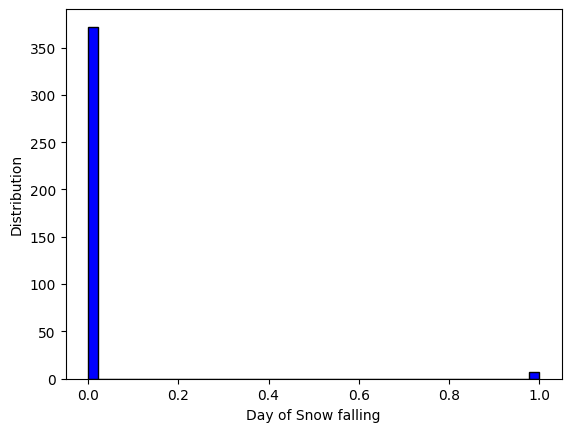

In [ ]:
figsize=(7, 5)

plt.hist(merged['Day of Snow falling'], color='blue', edgecolor='black', bins=int(45/1))

plt.xlabel('Day of Snow falling')
plt.ylabel('Distribution')
plt.show()

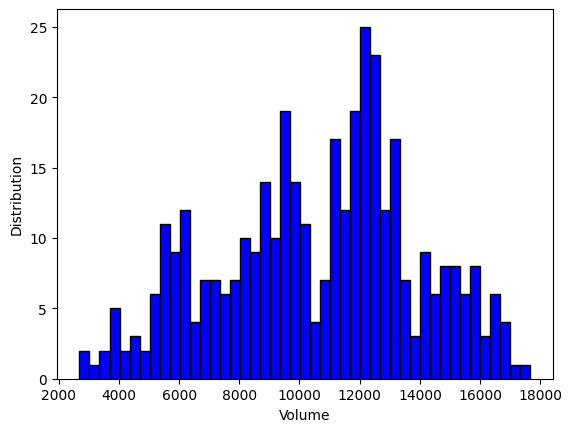

In [ ]:
figsize=(7, 5)

plt.hist(merged['Volume'], color='blue', edgecolor='black', bins=int(45/1))

plt.xlabel('Volume')
plt.ylabel('Distribution')
plt.show()

In [ ]:
corr_matrix =merged.corr().abs()
corr_matrix.style.background_gradient(cmap="GnBu")

<ipython-input-114-2ecd80868a66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =merged.corr().abs()


,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume
Daily Maximum Temperature (0900-0900) (°C),1.000000,0.702169,0.398624,0.936794,0.043556,0.014435,0.032739,0.134422,0.101044,0.496557,0.274529,0.032248,0.144157
Daily Minimum Temperature (0900-0900) (°C),0.702169,1.000000,0.617506,0.906880,0.116167,0.126252,0.118828,0.121868,0.113521,0.005689,0.238733,0.114951,0.093083
Day of Air Frost (0900-0900),0.398624,0.617506,1.000000,0.539445,0.071608,0.089564,0.053495,0.291232,0.291424,0.009618,0.256158,0.061383,0.099349
Daily Mean Temperature (0900-0900) (°C),0.936794,0.906880,0.539445,1.000000,0.031068,0.053642,0.077584,0.019536,0.003960,0.291258,0.280695,0.075610,0.039562
Daily Total Rainfall (0900-0900)(mm),0.043556,0.116167,0.071608,0.031068,1.000000,0.815245,0.820400,0.220694,0.227920,0.262068,0.009901,0.070634,0.153584
Daily Rainfall Total >4.9mm,0.014435,0.126252,0.089564,0.053642,0.815245,1.000000,0.643228,0.218900,0.231435,0.231655,0.065861,0.070504,0.127165
Daily Rainfall Total >9.9mm,0.032739,0.118828,0.053495,0.077584,0.820400,0.643228,1.000000,0.136949,0.128045,0.144395,0.042364,0.045350,0.089616
Daily Mean Windspeed (0100-2400) (kn),0.134422,0.121868,0.291232,0.019536,0.220694,0.218900,0.136949,1.000000,0.916493,0.167557,0.074284,0.103686,0.225177
Daily Maximum Gust (0100-2400) (kn),0.101044,0.113521,0.291424,0.003960,0.227920,0.231435,0.128045,0.916493,1.000000,0.158200,0.089703,0.099847,0.268041
Daily Total Sunshine (0100-2400) (hrs),0.496557,0.005689,0.009618,0.291258,0.262068,0.231655,0.144395,0.167557,0.158200,1.000000,0.097728,0.090077,0.339077


<ipython-input-115-cc3b80d49ceb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1=merged.corr()


<Axes: >

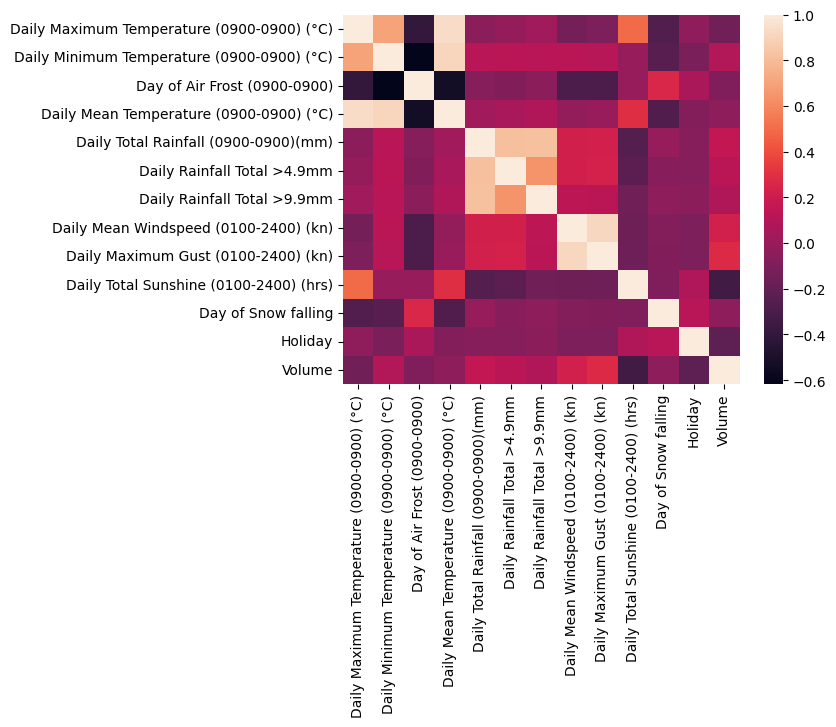

In [ ]:

#Correlation of data using seaborn
correlation1=merged.corr()
import seaborn
seaborn.heatmap(correlation1)

Starting with the modelling using random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
X = merged.drop(['Volume', 'Date'], axis=1)
y= merged['Volume']

In [ ]:
y

0      14343
1      12732
2      10685
3      15179
4      14967
       ...  
374     8650
375     8822
376     9081
377     8419
378     4430
Name: Volume, Length: 379, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:

rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42, )
#(n_estimators=1000, random_state=42, max_depth=6,max_leaf_nodes=6)

In [ ]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred=rf_regressor.predict(X_test)

In [ ]:
print(y_pred)

[0.44090152 0.55245743 0.46394078 0.32871737 0.66311518 0.49308293
 0.56724838 0.22924698 0.31473019 0.32309354 0.59855559 0.52367443
 0.61981866 0.67836529 0.32880931 0.53868011 0.68616218 0.27554116
 0.53664058 0.23453542 0.62293937 0.46675616 0.4549363  0.51078487
 0.43198992 0.58291    0.76623035 0.33217827 0.53898598 0.47911164
 0.52524224 0.48827061 0.53014542 0.67934186 0.63090485 0.60789284
 0.83424384 0.4972801  0.27041036 0.27476571 0.5690657  0.62727876
 0.69849049 0.36382006 0.55097944 0.45455452 0.42923783 0.7082182
 0.34697343 0.75714849 0.58550043 0.3510239  0.51389063 0.50759932
 0.55700641 0.51694665 0.81480811 0.40731522 0.36330026 0.4729761
 0.23825446 0.50316605 0.60924611 0.47952641 0.58955418 0.64035982
 0.47661147 0.26626768 0.55009441 0.58723129 0.67002764 0.59892709
 0.58937084 0.52174761 0.31088022 0.63544568]


In [ ]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print('R2 score: ', r2)

Mean Squared Error: 0.03191984676957216
Mean Absolute Error: 0.13957045100733403
R2 score:  0.37818898500012144


In [ ]:
#After one round we add time stamp to see if there is improvement on the rmse and mae
merged['Date']

0     2020-01-03
1     2020-01-04
2     2020-01-05
3     2020-01-06
4     2020-01-07
         ...    
374   2021-01-11
375   2021-01-12
376   2021-01-13
377   2021-01-14
378   2021-01-15
Name: Date, Length: 379, dtype: datetime64[ns]

In [ ]:
Days=pd.DataFrame(merged['Date'])

In [ ]:
Day=[]

In [ ]:
for i in Days['Date']:
  day_name=i.strftime('%A')
  Day.append(day_name)

print(Day)

['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday

In [ ]:
Days['day_name']=Day

In [ ]:
Days

,Date,day_name
0,2020-01-03,Friday
1,2020-01-04,Saturday
2,2020-01-05,Sunday
3,2020-01-06,Monday
4,2020-01-07,Tuesday
...,...,...
374,2021-01-11,Monday
375,2021-01-12,Tuesday
376,2021-01-13,Wednesday
377,2021-01-14,Thursday


In [ ]:
#Create a dummy variables for all of the day_names
dum_days=pd.get_dummies(Days['day_name'])

In [ ]:
Days=pd.concat([Days, dum_days], axis=1)

In [ ]:
Days

,Date,day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2020-01-03,Friday,1,0,0,0,0,0,0
1,2020-01-04,Saturday,0,0,1,0,0,0,0
2,2020-01-05,Sunday,0,0,0,1,0,0,0
3,2020-01-06,Monday,0,1,0,0,0,0,0
4,2020-01-07,Tuesday,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
374,2021-01-11,Monday,0,1,0,0,0,0,0
375,2021-01-12,Tuesday,0,0,0,0,0,1,0
376,2021-01-13,Wednesday,0,0,0,0,0,0,1
377,2021-01-14,Thursday,0,0,0,0,1,0,0


In [ ]:
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,3.5,0,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,2.1,0,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,0.5,0,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0.0,0,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0.0,0,0,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,0.0,0,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,4.5,0,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,0.0,0,0,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0.0,0,0,8419


In [ ]:
merged=pd.merge(merged, Days, how='inner', on='Date')
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,Holiday,Volume,day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,...,0,14343,Friday,1,0,0,0,0,0,0
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,...,0,12732,Saturday,0,0,1,0,0,0,0
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,...,0,10685,Sunday,0,0,0,1,0,0,0
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,...,0,15179,Monday,0,1,0,0,0,0,0
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,...,0,14967,Tuesday,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,...,0,8650,Monday,0,1,0,0,0,0,0
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,...,0,8822,Tuesday,0,0,0,0,0,1,0
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,...,0,9081,Wednesday,0,0,0,0,0,0,1
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,...,0,8419,Thursday,0,0,0,0,1,0,0


In [ ]:
merged['daily_vol']=merged['Volume']

In [ ]:
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,Volume,day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,daily_vol
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,...,14343,Friday,1,0,0,0,0,0,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,...,12732,Saturday,0,0,1,0,0,0,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,...,10685,Sunday,0,0,0,1,0,0,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,...,15179,Monday,0,1,0,0,0,0,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,...,14967,Tuesday,0,0,0,0,0,1,0,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,...,8650,Monday,0,1,0,0,0,0,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,...,8822,Tuesday,0,0,0,0,0,1,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,...,9081,Wednesday,0,0,0,0,0,0,1,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,...,8419,Thursday,0,0,0,0,1,0,0,8419


In [ ]:
merged=merged.drop(['Volume'], axis=1)
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,Holiday,day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,daily_vol
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,...,0,Friday,1,0,0,0,0,0,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,...,0,Saturday,0,0,1,0,0,0,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,...,0,Sunday,0,0,0,1,0,0,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,...,0,Monday,0,1,0,0,0,0,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,...,0,Tuesday,0,0,0,0,0,1,0,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,...,0,Monday,0,1,0,0,0,0,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,...,0,Tuesday,0,0,0,0,0,1,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,...,0,Wednesday,0,0,0,0,0,0,1,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,...,0,Thursday,0,0,0,0,1,0,0,8419


In [ ]:
merged=merged.drop('day_name', axis=1)
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,Day of Snow falling,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,daily_vol
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,...,0,0,1,0,0,0,0,0,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,...,0,0,0,0,1,0,0,0,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,...,0,0,0,0,0,1,0,0,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,...,0,0,0,1,0,0,0,0,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,...,0,0,0,0,0,0,0,1,0,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,...,0,0,0,1,0,0,0,0,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,...,0,0,0,0,0,0,0,1,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,...,0,0,0,0,0,0,0,0,1,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,...,0,0,0,0,0,0,1,0,0,8419


In [ ]:
merged=merged.rename(columns={'daily_vol': 'Volume'})
merged

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,Day of Snow falling,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Volume
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,...,0,0,1,0,0,0,0,0,0,14343
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,...,0,0,0,0,1,0,0,0,0,12732
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,...,0,0,0,0,0,1,0,0,0,10685
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,...,0,0,0,1,0,0,0,0,0,15179
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,...,0,0,0,0,0,0,0,1,0,14967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,...,0,0,0,1,0,0,0,0,0,8650
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,...,0,0,0,0,0,0,0,1,0,8822
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,...,0,0,0,0,0,0,0,0,1,9081
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,...,0,0,0,0,0,0,1,0,0,8419


In [ ]:
#Drop unnnecessary variables( similar features thus easier and so making the model wasier and not interrupted]
merged.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Holiday                                                int64
Friday                                                 uint8
Monday                                                 uint8
Saturday                                               uint8
Sunday                  

In [ ]:
corr_matrix =merged.corr().abs()
corr_matrix.style.background_gradient(cmap="GnBu")

<ipython-input-137-2ecd80868a66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =merged.corr().abs()


,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Volume
Daily Maximum Temperature (0900-0900) (°C),1.000000,0.702169,0.398624,0.936794,0.043556,0.014435,0.032739,0.134422,0.101044,0.496557,0.274529,0.032248,0.004372,0.006080,0.001863,0.008868,0.020750,0.015789,0.001480,0.144157
Daily Minimum Temperature (0900-0900) (°C),0.702169,1.000000,0.617506,0.906880,0.116167,0.126252,0.118828,0.121868,0.113521,0.005689,0.238733,0.114951,0.019067,0.026112,0.001534,0.035179,0.008600,0.005682,0.025962,0.093083
Day of Air Frost (0900-0900),0.398624,0.617506,1.000000,0.539445,0.071608,0.089564,0.053495,0.291232,0.291424,0.009618,0.256158,0.061383,0.037761,0.017222,0.029906,0.053470,0.017222,0.006342,0.017222,0.099349
Daily Mean Temperature (0900-0900) (°C),0.936794,0.906880,0.539445,1.000000,0.031068,0.053642,0.077584,0.019536,0.003960,0.291258,0.280695,0.075610,0.006833,0.008718,0.000111,0.012573,0.016720,0.006231,0.013630,0.039562
Daily Total Rainfall (0900-0900)(mm),0.043556,0.116167,0.071608,0.031068,1.000000,0.815245,0.820400,0.220694,0.227920,0.262068,0.009901,0.070634,0.038461,0.044562,0.111801,0.051577,0.072035,0.030403,0.036407,0.153584
Daily Rainfall Total >4.9mm,0.014435,0.126252,0.089564,0.053642,0.815245,1.000000,0.643228,0.218900,0.231435,0.231655,0.065861,0.070504,0.044224,0.021592,0.055793,0.017100,0.040938,0.017100,0.017100,0.127165
Daily Rainfall Total >9.9mm,0.032739,0.118828,0.053495,0.077584,0.820400,0.643228,1.000000,0.136949,0.128045,0.144395,0.042364,0.045350,0.047531,0.061530,0.115077,0.018791,0.045564,0.072338,0.007983,0.089616
Daily Mean Windspeed (0100-2400) (kn),0.134422,0.121868,0.291232,0.019536,0.220694,0.218900,0.136949,1.000000,0.916493,0.167557,0.074284,0.103686,0.008530,0.041412,0.094184,0.029418,0.104912,0.010228,0.061735,0.225177
Daily Maximum Gust (0100-2400) (kn),0.101044,0.113521,0.291424,0.003960,0.227920,0.231435,0.128045,0.916493,1.000000,0.158200,0.089703,0.099847,0.015903,0.022533,0.073856,0.028032,0.092945,0.001296,0.046204,0.268041
Daily Total Sunshine (0100-2400) (hrs),0.496557,0.005689,0.009618,0.291258,0.262068,0.231655,0.144395,0.167557,0.158200,1.000000,0.097728,0.090077,0.008663,0.042815,0.036739,0.032070,0.016988,0.045410,0.018453,0.339077


Text(0, 0.5, 'Values')

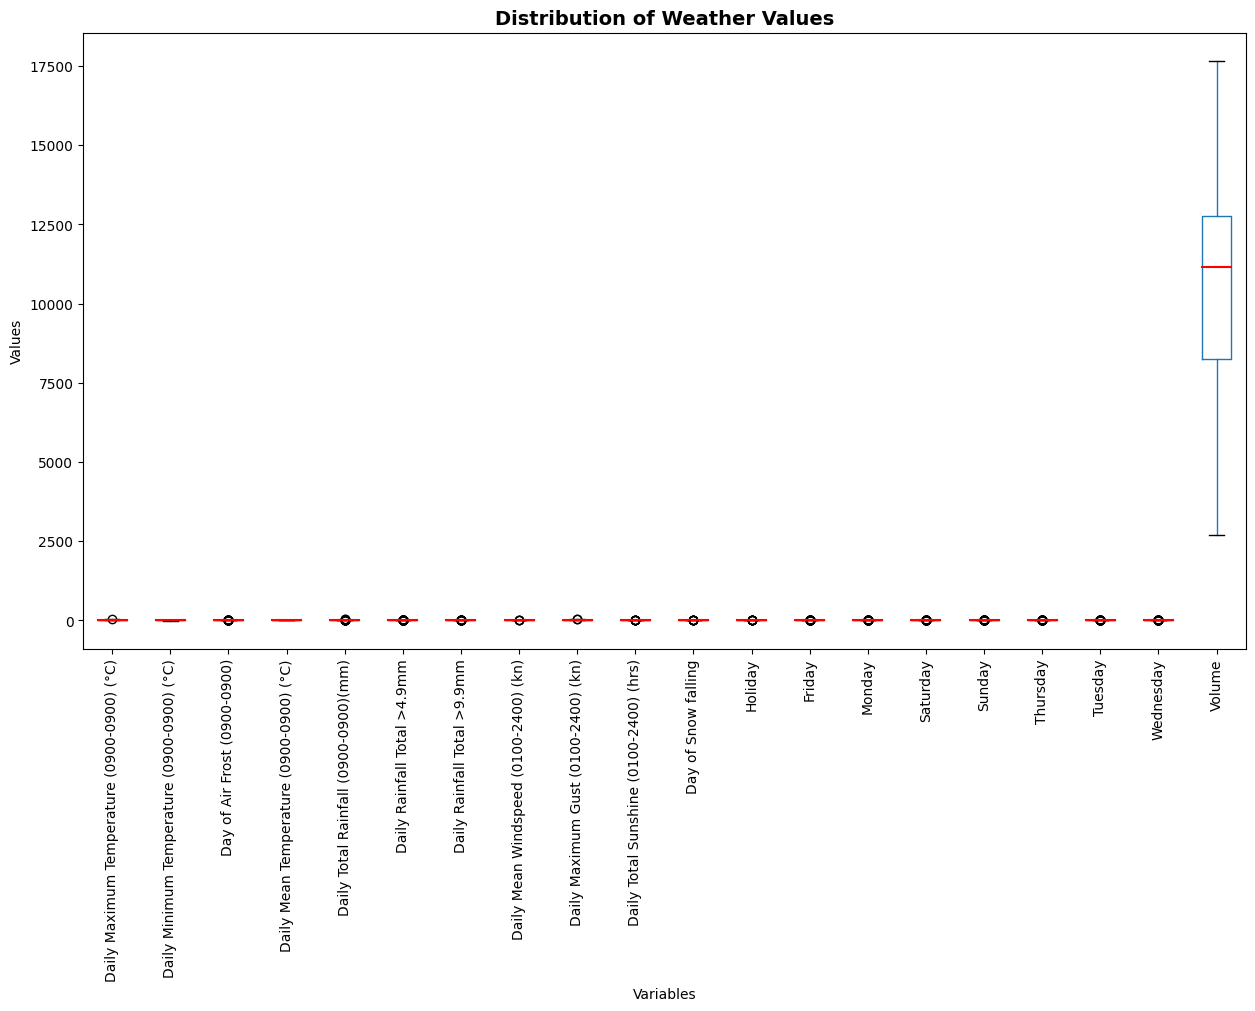

In [ ]:
boxplot = merged. boxplot(figsize = (15,8), rot = 90, fontsize= '10', grid = False, medianprops=dict(color="red",linewidth=1.5))
boxplot.set_title('Distribution of Weather Values',fontsize=14, fontweight='bold')
boxplot.set_facecolor('white')
boxplot.set_xlabel('Variables')
boxplot.set_ylabel('Values')

In [ ]:
merged2=merged.copy()

In [ ]:
merged2.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Holiday                                                int64
Friday                                                 uint8
Monday                                                 uint8
Saturday                                               uint8
Sunday                  

Extracting the month names from dates

In [ ]:
month_name=[]

In [ ]:
Days.dtypes

Date        datetime64[ns]
month_1              uint8
month_2              uint8
month_3              uint8
month_4              uint8
month_5              uint8
month_6              uint8
month_7              uint8
month_8              uint8
month_9              uint8
month_10             uint8
month_11             uint8
month_12             uint8
dtype: object

In [ ]:
for i in Days['Date']:
  month=i.month
  month_name.append(month)



In [ ]:
Days

,Date,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2020-01-03,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-04,1,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-05,1,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-06,1,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-07,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,1,0,0,0,0,0,0,0,0,0,0,0
375,2021-01-12,1,0,0,0,0,0,0,0,0,0,0,0
376,2021-01-13,1,0,0,0,0,0,0,0,0,0,0,0
377,2021-01-14,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Days=Days.drop(Days.columns[1:9], axis=1)

In [ ]:
Days['months']=month_name

In [ ]:

Days

,Date,month_9,month_10,month_11,month_12,months
0,2020-01-03,0,0,0,0,1
1,2020-01-04,0,0,0,0,1
2,2020-01-05,0,0,0,0,1
3,2020-01-06,0,0,0,0,1
4,2020-01-07,0,0,0,0,1
...,...,...,...,...,...,...
374,2021-01-11,0,0,0,0,1
375,2021-01-12,0,0,0,0,1
376,2021-01-13,0,0,0,0,1
377,2021-01-14,0,0,0,0,1


In [ ]:
month_names=pd.get_dummies(Days['months'], prefix='month')
month_names

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
374,1,0,0,0,0,0,0,0,0,0,0,0
375,1,0,0,0,0,0,0,0,0,0,0,0
376,1,0,0,0,0,0,0,0,0,0,0,0
377,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Days=pd.concat([Days, month_names], axis=1)

In [ ]:
Days=Days.drop('months', axis=1)
Days

,Date,month_9,month_10,month_11,month_12,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2020-01-03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-04,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-05,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-06,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-07,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
375,2021-01-12,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
376,2021-01-13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
377,2021-01-14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
merged2=pd.merge(merged2, Days, how='inner', on='Date')
merged2

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,...,0,0,0,0,0,0,0,0,0,0
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,...,0,0,0,0,0,0,0,0,0,0
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,...,0,0,0,0,0,0,0,0,0,0
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

merged2.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Holiday                                                int64
Friday                                                 uint8
Monday                                                 uint8
Saturday                                               uint8
Sunday                  

In [ ]:
merged2['month_1']=merged2['month_1'].astype(int)

In [ ]:
merged2['month_2']=merged2['month_2'].astype(int)
merged2['month_3']=merged2['month_3'].astype(int)
merged2['month_4']=merged2['month_4'].astype(int)
merged2['month_5']=merged2['month_5'].astype(int)
merged2['month_6']=merged2['month_6'].astype(int)
merged2['month_7']=merged2['month_7'].astype(int)
merged2['month_8']=merged2['month_8'].astype(int)
merged2['month_9']=merged2['month_9'].astype(int)
merged2['month_10']=merged2['month_10'].astype(int)
merged2['month_11']=merged2['month_11'].astype(int)
merged2['month_12']=merged2['month_12'].astype(int)

In [ ]:
merged2.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Holiday                                                int64
Friday                                                 uint8
Monday                                                 uint8
Saturday                                               uint8
Sunday                  

In [ ]:
merged2['Friday']=merged2['Friday'].astype(int)
merged2['Monday']=merged2['Monday'].astype(int)
merged2['Saturday']=merged2['Saturday'].astype(int)
merged2['Sunday']=merged2['Sunday'].astype(int)
merged2['Thursday']=merged2['Thursday'].astype(int)
merged2['Tuesday']=merged2['Tuesday'].astype(int)
merged2['Wednesday']=merged2['Wednesday'].astype(int)
merged2.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                           int64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                            int64
Daily Rainfall Total >9.9mm                            int64
Daily Mean Windspeed (0100-2400) (kn)                  int64
Daily Maximum Gust (0100-2400) (kn)                    int64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                    int64
Holiday                                                int64
Friday                                                 int64
Monday                                                 int64
Saturday                                               int64
Sunday                  

In [ ]:
#normalize weather variables features into 0 to 1 scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [ ]:
merged2.iloc[:,1:] = scaler.fit_transform(merged2.iloc[:,1:])

merged2.head()

<ipython-input-158-3c228291e8fe>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged2.iloc[:,1:] = scaler.fit_transform(merged2.iloc[:,1:])


,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2020-01-03,0.222910,0.423729,0.0,0.323077,0.000000,0.0,0.0,0.40,0.382979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-04,0.269350,0.444915,0.0,0.361538,0.000000,0.0,0.0,0.45,0.404255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-05,0.300310,0.457627,0.0,0.384615,0.005525,0.0,0.0,0.25,0.234043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-06,0.260062,0.508475,0.0,0.384615,0.033149,0.0,0.0,0.40,0.468085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-07,0.396285,0.423729,0.0,0.430769,0.005525,0.0,0.0,0.45,0.489362,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Values')

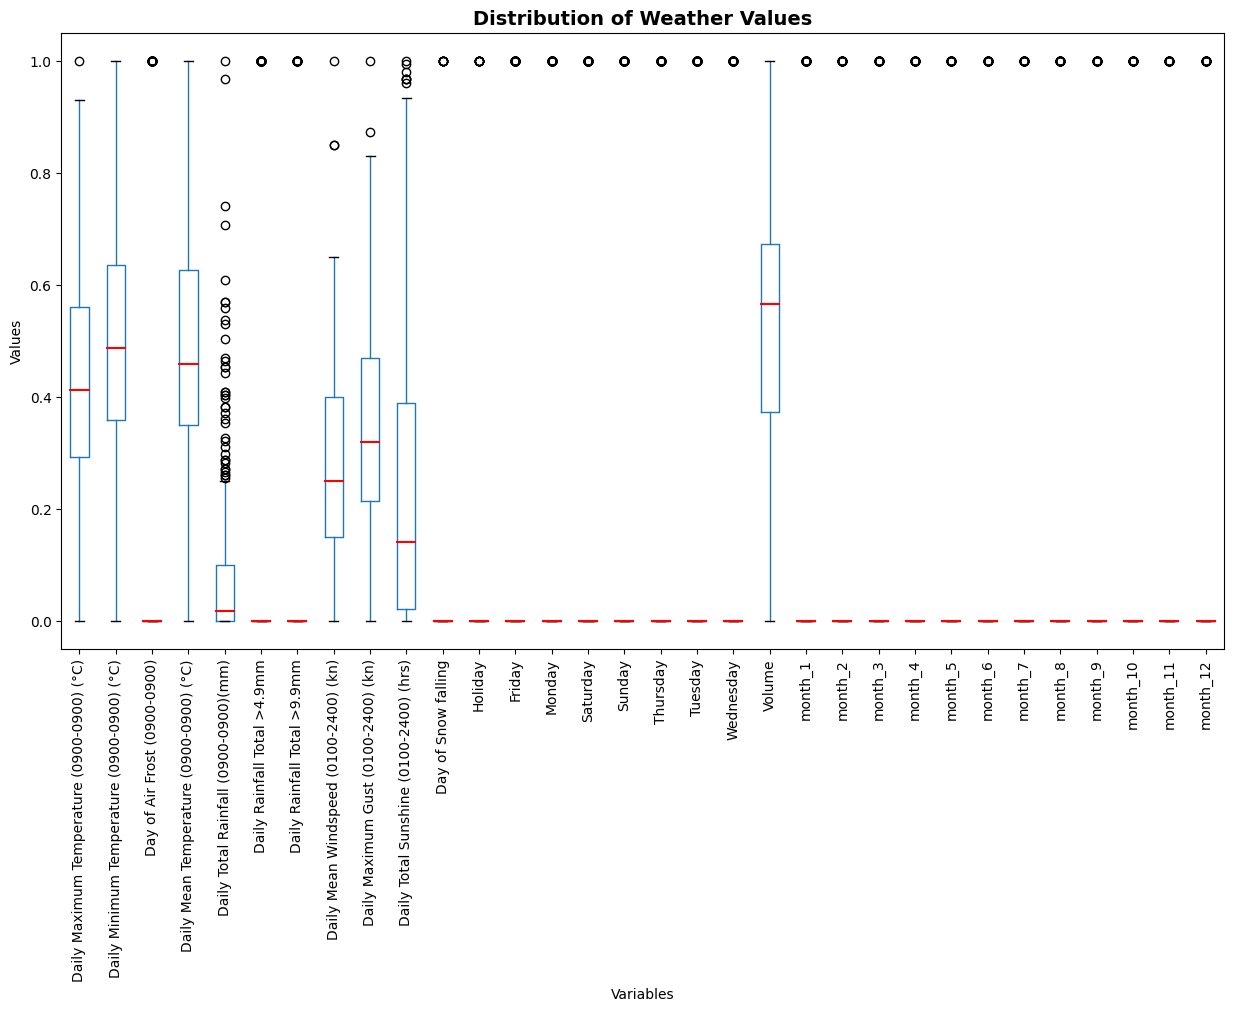

In [ ]:
boxplot = merged2. boxplot(figsize = (15,8), rot = 90, fontsize= '10', grid = False, medianprops=dict(color="red",linewidth=1.5))
boxplot.set_title('Distribution of Weather Values',fontsize=14, fontweight='bold')
boxplot.set_facecolor('white')
boxplot.set_xlabel('Variables')
boxplot.set_ylabel('Values')


In [ ]:
corr_matrix =merged2.corr().abs()
corr_matrix.style.background_gradient(cmap="GnBu")

<ipython-input-160-16a583032038>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =merged2.corr().abs()


,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Volume,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Daily Maximum Temperature (0900-0900) (°C),1.000000,0.702169,0.398624,0.936794,0.043556,0.014435,0.032739,0.134422,0.101044,0.496557,0.274529,0.032248,0.004372,0.006080,0.001863,0.008868,0.020750,0.015789,0.001480,0.144157,0.422880,0.235013,0.155964,0.100072,0.211822,0.277391,0.253539,0.356525,0.205272,0.030164,0.127698,0.361775
Daily Minimum Temperature (0900-0900) (°C),0.702169,1.000000,0.617506,0.906880,0.116167,0.126252,0.118828,0.121868,0.113521,0.005689,0.238733,0.114951,0.019067,0.026112,0.001534,0.035179,0.008600,0.005682,0.025962,0.093083,0.311105,0.175262,0.232341,0.084279,0.030734,0.285238,0.328203,0.391291,0.127726,0.046853,0.028394,0.265453
Day of Air Frost (0900-0900),0.398624,0.617506,1.000000,0.539445,0.071608,0.089564,0.053495,0.291232,0.291424,0.009618,0.256158,0.061383,0.037761,0.017222,0.029906,0.053470,0.017222,0.006342,0.017222,0.099349,0.254342,0.011364,0.132275,0.045239,0.048057,0.106256,0.108167,0.108167,0.075747,0.108167,0.014731,0.192385
Daily Mean Temperature (0900-0900) (°C),0.936794,0.906880,0.539445,1.000000,0.031068,0.053642,0.077584,0.019536,0.003960,0.291258,0.280695,0.075610,0.006833,0.008718,0.000111,0.012573,0.016720,0.006231,0.013630,0.039562,0.403351,0.224978,0.206425,0.017993,0.110388,0.303805,0.311453,0.403126,0.184358,0.005040,0.089138,0.344705
Daily Total Rainfall (0900-0900)(mm),0.043556,0.116167,0.071608,0.031068,1.000000,0.815245,0.820400,0.220694,0.227920,0.262068,0.009901,0.070634,0.038461,0.044562,0.111801,0.051577,0.072035,0.030403,0.036407,0.153584,0.009791,0.152561,0.073678,0.119171,0.162724,0.114208,0.000405,0.065365,0.095463,0.113173,0.033229,0.052592
Daily Rainfall Total >4.9mm,0.014435,0.126252,0.089564,0.053642,0.815245,1.000000,0.643228,0.218900,0.231435,0.231655,0.065861,0.070504,0.044224,0.021592,0.055793,0.017100,0.040938,0.017100,0.017100,0.127165,0.047344,0.141627,0.069273,0.090673,0.143300,0.084659,0.004753,0.103454,0.065625,0.054104,0.040578,0.078779
Daily Rainfall Total >9.9mm,0.032739,0.118828,0.053495,0.077584,0.820400,0.643228,1.000000,0.136949,0.128045,0.144395,0.042364,0.045350,0.047531,0.061530,0.115077,0.018791,0.045564,0.072338,0.007983,0.089616,0.024281,0.087131,0.023877,0.055882,0.092174,0.082771,0.058026,0.112718,0.055882,0.112718,0.021219,0.058026
Daily Mean Windspeed (0100-2400) (kn),0.134422,0.121868,0.291232,0.019536,0.220694,0.218900,0.136949,1.000000,0.916493,0.167557,0.074284,0.103686,0.008530,0.041412,0.094184,0.029418,0.104912,0.010228,0.061735,0.225177,0.073985,0.389349,0.060407,0.057171,0.058914,0.029221,0.031378,0.065033,0.097545,0.002276,0.010587,0.006902
Daily Maximum Gust (0100-2400) (kn),0.101044,0.113521,0.291424,0.003960,0.227920,0.231435,0.128045,0.916493,1.000000,0.158200,0.089703,0.099847,0.015903,0.022533,0.073856,0.028032,0.092945,0.001296,0.046204,0.268041,0.096416,0.411061,0.084038,0.062898,0.042209,0.036793,0.045716,0.039871,0.112734,0.009225,0.004756,0.037533
Daily Total Sunshine (0100-2400) (hrs),0.496557,0.005689,0.009618,0.291258,0.262068,0.231655,0.144395,0.167557,0.158200,1.000000,0.097728,0.090077,0.008663,0.042815,0.036739,0.032070,0.016988,0.045410,0.018453,0.339077,0.230953,0.119622,0.084590,0.301089,0.350763,0.064830,0.045010,0.035540,0.103637,0.140947,0.159958,0.203944


<ipython-input-161-aef3c95eb4ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1=merged2.corr()


<Axes: >

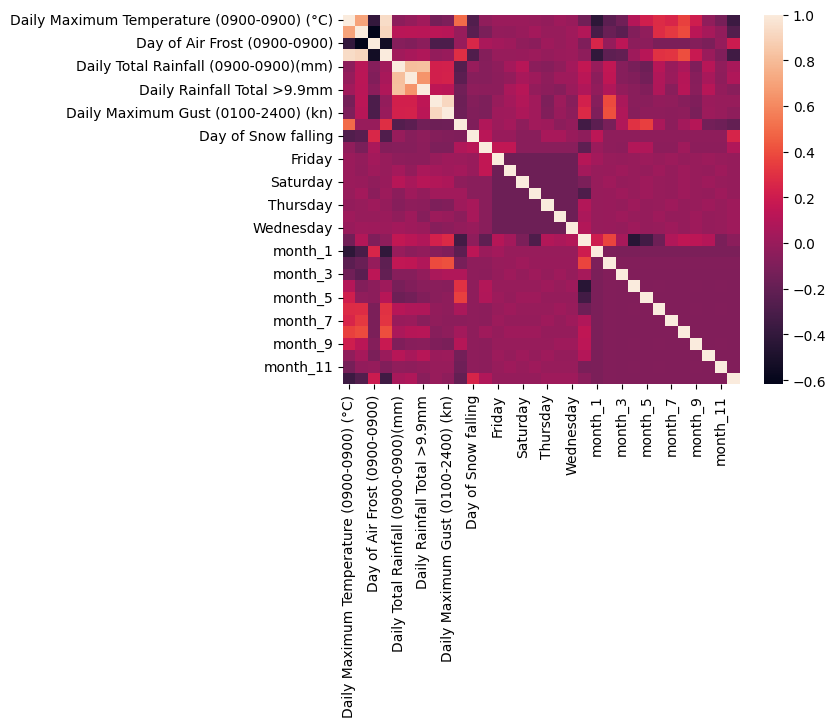

In [ ]:
#Correlation of data using seaborn
correlation1=merged2.corr()
import seaborn
seaborn.heatmap(correlation1)

In [ ]:
#Passing the dataset with time variables as dummy variables (monthnames, daynames)

In [ ]:
X2 = merged2.drop(['Volume', 'Date'], axis=1)
y2= merged2['Volume']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)


In [ ]:

rf_regressor2 = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=20, max_leaf_nodes=30)
#(n_estimators=1000, random_state=42, max_depth=6,max_leaf_nodes=6)

In [ ]:
rfm2=rf_regressor2.fit(X_train, y_train)

In [ ]:
y_pred=rf_regressor2.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print('r2 score is: ', r2)

Mean Squared Error: 0.011813606132058372
Mean Absolute Error: 0.07757930496520908
r2 score is:  0.769866363306403


In [ ]:
merged2

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2020-01-03,0.222910,0.423729,0.0,0.323077,0.000000,0.0,0.0,0.428571,0.442308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-04,0.269350,0.444915,0.0,0.361538,0.000000,0.0,0.0,0.476190,0.461538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-05,0.300310,0.457627,0.0,0.384615,0.005525,0.0,0.0,0.285714,0.307692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-06,0.260062,0.508475,0.0,0.384615,0.033149,0.0,0.0,0.428571,0.519231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-07,0.396285,0.423729,0.0,0.430769,0.005525,0.0,0.0,0.476190,0.538462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,0.250774,0.322034,0.0,0.292308,0.607735,1.0,1.0,0.380952,0.423077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,2021-01-12,0.160991,0.368644,0.0,0.257692,0.038674,0.0,0.0,0.190476,0.269231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,2021-01-13,0.164087,0.177966,1.0,0.173077,0.707182,1.0,1.0,0.095238,0.153846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
377,2021-01-14,0.092879,0.309322,0.0,0.188462,0.066298,0.0,0.0,0.190476,0.211538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#trying the k-cross fold validation for this
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [ ]:
num_folds = 5



In [ ]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)


In [ ]:
scores= cross_val_score(rf_regressor2, X2, y2, cv=kfold, scoring='neg_mean_squared_error')
r2_scores=cross_val_score(rf_regressor2, X2, y2, cv=kfold,scoring='r2')

In [ ]:
mean_r2=r2_scores.mean()

In [ ]:
mean_mse= -scores.mean()
std_mse=scores.std()

In [ ]:
print('Mean MSE: ', mean_mse)
print("Standard Deviation of MSE: ", std_mse)

Mean MSE:  0.014029329555061578
Standard Deviation of MSE:  0.0021875545682181544


In [ ]:
print("R^2 for each fold: ", r2_scores)
print("Mean R^2 score: ", mean_r2)

R^2 for each fold:  [0.76759395 0.66621341 0.75277375 0.66506714 0.67257009]
Mean R^2 score:  0.7048436682366832


XG BOOSTER

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
parameters = {
            'colsample_bytree':[1.0,0.9],
            'gamma':[0,0.03,0.1,0.3],
            'min_child_weight':[1.0,1.5,6,10],
            'learning_rate':[0.3,0.1,0.07,0.01],
            'max_depth':[3,5,8,10],
            'n_estimators':[10000,5000],
            'reg_alpha':[1e-5, 1e-2,  0.75],
            'reg_lambda':[1e-5, 1e-2, 0.45],
            'subsample':[0.8,0.95]  }


In [ ]:
#Lets now fit a XGBOOST model to all the data we have
xgb_new = XGBRegressor()
gsearch_new = RandomizedSearchCV(estimator=xgb_new, param_distributions=parameters, n_iter=30, scoring='neg_mean_squared_error', cv=5)
training_features_new = X


NameError: ignored

In [ ]:
gsearch_new.fit(np.array(training_features_new), np.array(y))
colsample_bytree_best=gsearch_new.best_params_['colsample_bytree']
gamma_best=gsearch_new.best_params_['gamma']
min_child_weight_best=gsearch_new.best_params_['min_child_weight']
learning_rate_best=gsearch_new.best_params_['learning_rate']
max_depth_best=gsearch_new.best_params_['max_depth']
n_estimators_best=gsearch_new.best_params_['n_estimators']
reg_alpha_best=gsearch_new.best_params_['reg_alpha']
reg_lambda_best=gsearch_new.best_params_['reg_lambda']
subsample_best=gsearch_new.best_params_['subsample']
best_xgb_model_new = XGBRegressor(colsample_bytree=colsample_bytree_best,gamma=gamma_best,learning_rate=learning_rate_best,max_depth=max_depth_best,min_child_weight=min_child_weight_best,n_estimators=n_estimators_best,reg_alpha=reg_alpha_best,reg_lambda=reg_lambda_best,subsample=subsample_best,seed=42)
best_xgb_model_new.fit(np.array(training_features_new), np.array(y))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=5000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#to see results of the using XGBOOST on merged2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = best_xgb_model_new.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 0.016611764987968913
R-squared score: 0.676396364848626


MERGED 3 IS COMPRESSING THE MONTHS AND THE DAY HENCE HIGHER MONTHs INDICATE THE LATER MONTHS AND MONDAY IS 1 AND ONWARDS FOR THE DAYS.

In [ ]:
merged3=merged2.copy()


In [ ]:
merged3['month_name']=month_name

In [ ]:
merged3=merged3.drop(['month_1','month_2','month_3','month_4','month_5','month_6','month_7','month_8','month_9','month_10','month_11','month_12'], axis=1)
merged3

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),...,Holiday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Volume,month_name
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,...,0,1,0,0,0,0,0,0,14343,1
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,...,0,0,0,1,0,0,0,0,12732,1
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,...,0,0,0,0,1,0,0,0,10685,1
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,...,0,0,1,0,0,0,0,0,15179,1
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,...,0,0,0,0,0,0,1,0,14967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,...,0,0,1,0,0,0,0,0,8650,1
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,...,0,0,0,0,0,0,1,0,8822,1
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,...,0,0,0,0,0,0,0,1,9081,1
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,...,0,0,0,0,0,1,0,0,8419,1


In [ ]:
merged3['Day']=Day

In [ ]:
merged3=merged3.drop(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], axis=1)

In [ ]:
merged3['Day'] = merged3['Day'].replace('Monday', 1)
merged3['Day'] = merged3['Day'].replace('Tuesday', 2)
merged3['Day'] = merged3['Day'].replace('Wednesday', 3)
merged3['Day'] = merged3['Day'].replace('Thursday', 4)
merged3['Day'] = merged3['Day'].replace('Friday', 5)
merged3['Day'] = merged3['Day'].replace('Saturday', 6)
merged3['Day'] = merged3['Day'].replace('Sunday', 7)

In [ ]:
merged3

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume,month_name,Day
0,2020-01-03,7.9,4.4,0,6.2,0.0,0,0,9,23,3.5,0,0,14343,1,5
1,2020-01-04,9.4,4.9,0,7.2,0.0,0,0,10,24,2.1,0,0,12732,1,6
2,2020-01-05,10.4,5.2,0,7.8,0.2,0,0,6,16,0.5,0,0,10685,1,7
3,2020-01-06,9.1,6.4,0,7.8,1.2,0,0,9,27,0.0,0,0,15179,1,1
4,2020-01-07,13.5,4.4,0,9.0,0.2,0,0,10,28,0.0,0,0,14967,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,8.8,2.0,0,5.4,22.0,1,1,8,22,0.0,0,0,8650,1,1
375,2021-01-12,5.9,3.1,0,4.5,1.4,0,0,4,14,4.5,0,0,8822,1,2
376,2021-01-13,6.0,-1.4,1,2.3,25.6,1,1,2,8,0.0,0,0,9081,1,3
377,2021-01-14,3.7,1.7,0,2.7,2.4,0,0,4,11,0.0,0,0,8419,1,4


In [ ]:
bar_merged3=merged3[['Volume', 'Day']].copy()

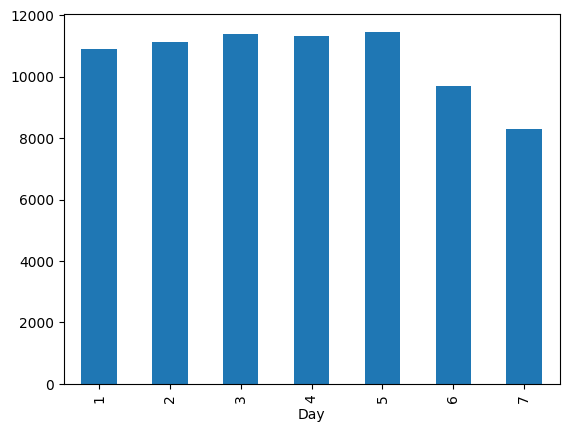

In [ ]:
import matplotlib.pyplot as plt
bar_merged3=merged3.groupby(['Day'])['Volume'].mean()
bar_merged3.plot.bar(x='Day', y='Volume')
plt.show()

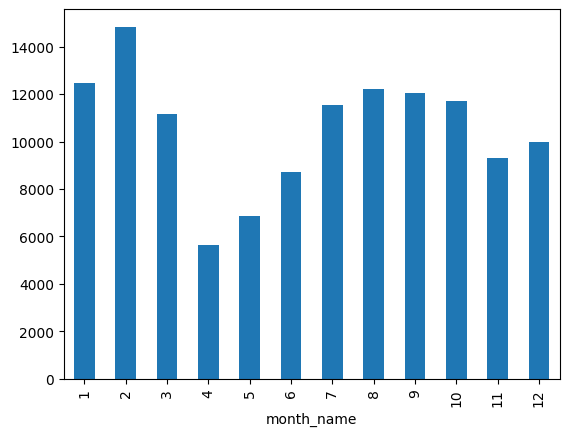

In [ ]:
import matplotlib.pyplot as plt
bar_merged3=merged3.groupby(['month_name'])['Volume'].mean()
bar_merged3.plot.bar(x='month', y='Volume')
plt.show()

In [ ]:
merged3.iloc[:,1:] = scaler.fit_transform(merged3.iloc[:,1:])

<ipython-input-204-c8da88fcd70d>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged3.iloc[:,1:] = scaler.fit_transform(merged3.iloc[:,1:])


In [ ]:
merged3

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume,month_name,Day
0,2020-01-03,0.222910,0.423729,0.0,0.323077,0.000000,0.0,0.0,0.40,0.382979,0.234899,0.0,0.0,0.777993,0.0,0.666667
1,2020-01-04,0.269350,0.444915,0.0,0.361538,0.000000,0.0,0.0,0.45,0.404255,0.140940,0.0,0.0,0.670428,0.0,0.833333
2,2020-01-05,0.300310,0.457627,0.0,0.384615,0.005525,0.0,0.0,0.25,0.234043,0.033557,0.0,0.0,0.533752,0.0,1.000000
3,2020-01-06,0.260062,0.508475,0.0,0.384615,0.033149,0.0,0.0,0.40,0.468085,0.000000,0.0,0.0,0.833812,0.0,0.000000
4,2020-01-07,0.396285,0.423729,0.0,0.430769,0.005525,0.0,0.0,0.45,0.489362,0.000000,0.0,0.0,0.819657,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,2021-01-11,0.250774,0.322034,0.0,0.292308,0.607735,1.0,1.0,0.35,0.361702,0.000000,0.0,0.0,0.397877,0.0,0.000000
375,2021-01-12,0.160991,0.368644,0.0,0.257692,0.038674,0.0,0.0,0.15,0.191489,0.302013,0.0,0.0,0.409361,0.0,0.166667
376,2021-01-13,0.164087,0.177966,1.0,0.173077,0.707182,1.0,1.0,0.05,0.063830,0.000000,0.0,0.0,0.426654,0.0,0.333333
377,2021-01-14,0.092879,0.309322,0.0,0.188462,0.066298,0.0,0.0,0.15,0.127660,0.000000,0.0,0.0,0.382453,0.0,0.500000


In [ ]:
merged3.head()

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume,month_name,Day
0,2020-01-03,0.222910,0.423729,0.0,0.323077,0.000000,0.0,0.0,0.40,0.382979,0.234899,0.0,0.0,0.777993,0.0,0.666667
1,2020-01-04,0.269350,0.444915,0.0,0.361538,0.000000,0.0,0.0,0.45,0.404255,0.140940,0.0,0.0,0.670428,0.0,0.833333
2,2020-01-05,0.300310,0.457627,0.0,0.384615,0.005525,0.0,0.0,0.25,0.234043,0.033557,0.0,0.0,0.533752,0.0,1.000000
3,2020-01-06,0.260062,0.508475,0.0,0.384615,0.033149,0.0,0.0,0.40,0.468085,0.000000,0.0,0.0,0.833812,0.0,0.000000
4,2020-01-07,0.396285,0.423729,0.0,0.430769,0.005525,0.0,0.0,0.45,0.489362,0.000000,0.0,0.0,0.819657,0.0,0.166667


In [ ]:
merged3.tail()

,Date,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume,month_name,Day
374,2021-01-11,0.250774,0.322034,0.0,0.292308,0.607735,1.0,1.0,0.35,0.361702,0.000000,0.0,0.0,0.397877,0.0,0.000000
375,2021-01-12,0.160991,0.368644,0.0,0.257692,0.038674,0.0,0.0,0.15,0.191489,0.302013,0.0,0.0,0.409361,0.0,0.166667
376,2021-01-13,0.164087,0.177966,1.0,0.173077,0.707182,1.0,1.0,0.05,0.063830,0.000000,0.0,0.0,0.426654,0.0,0.333333
377,2021-01-14,0.092879,0.309322,0.0,0.188462,0.066298,0.0,0.0,0.15,0.127660,0.000000,0.0,0.0,0.382453,0.0,0.500000
378,2021-01-15,0.117647,0.080508,1.0,0.100000,0.232044,1.0,0.0,0.30,0.255319,0.000000,0.0,0.0,0.116111,0.0,0.666667


In [ ]:
merged3.dtypes

Date                                          datetime64[ns]
Daily Maximum Temperature (0900-0900) (°C)           float64
Daily Minimum Temperature (0900-0900) (°C)           float64
Day of Air Frost (0900-0900)                         float64
Daily Mean Temperature (0900-0900) (°C)              float64
Daily Total Rainfall (0900-0900)(mm)                 float64
Daily Rainfall Total >4.9mm                          float64
Daily Rainfall Total >9.9mm                          float64
Daily Mean Windspeed (0100-2400) (kn)                float64
Daily Maximum Gust (0100-2400) (kn)                  float64
Daily Total Sunshine (0100-2400) (hrs)               float64
Day of Snow falling                                  float64
Holiday                                              float64
Volume                                               float64
month_name                                           float64
Day                                                  float64
dtype: object

In [ ]:
merged3.shape

(379, 16)

Text(0, 0.5, 'Values')

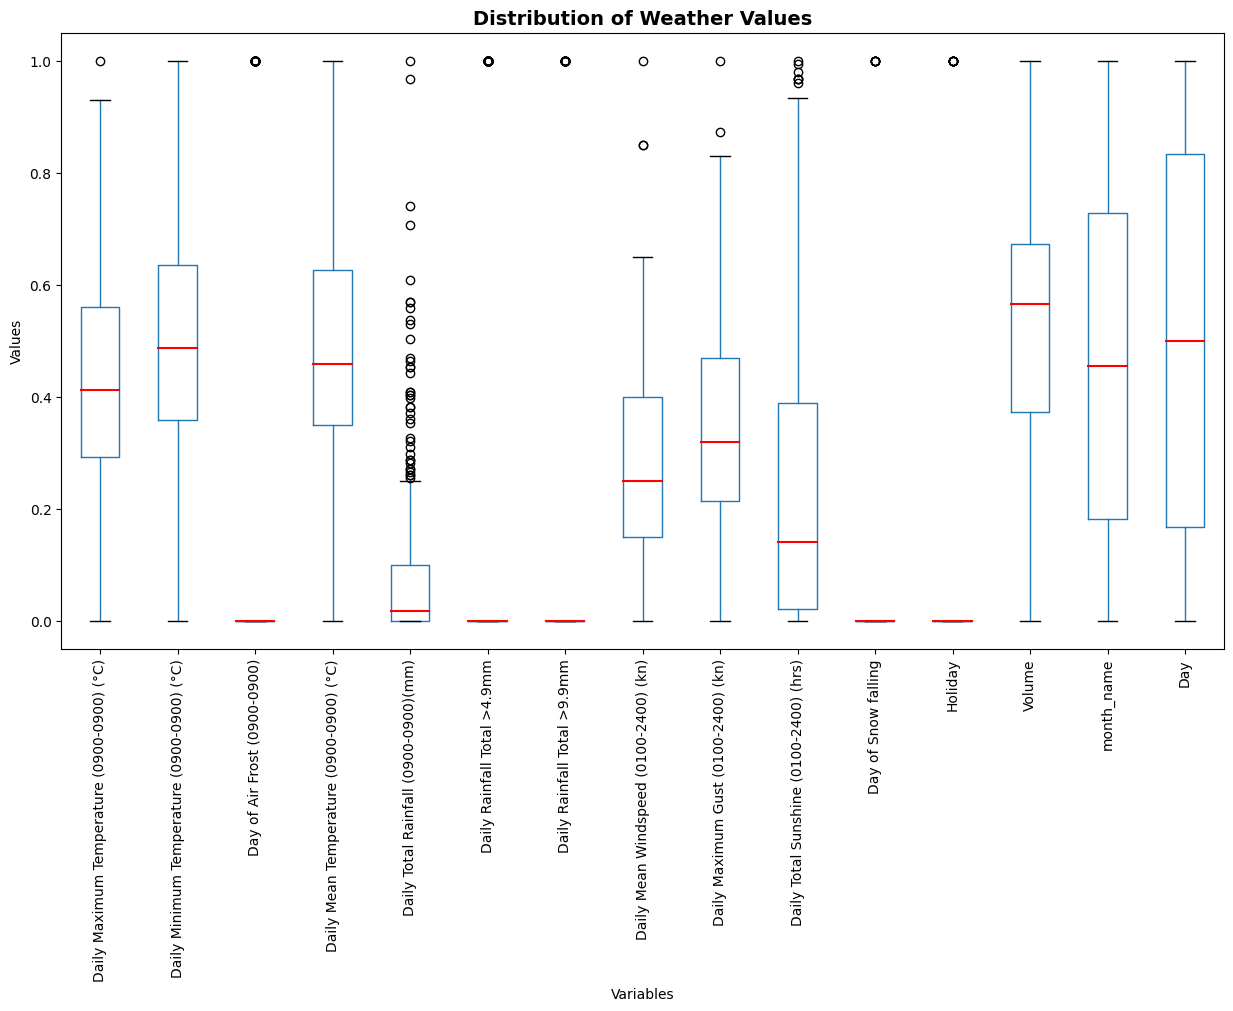

In [ ]:
boxplot = merged3. boxplot(figsize = (15,8), rot = 90, fontsize= '10', grid = False, medianprops=dict(color="red",linewidth=1.5))
boxplot.set_title('Distribution of Weather Values',fontsize=14, fontweight='bold')
boxplot.set_facecolor('white')
boxplot.set_xlabel('Variables')
boxplot.set_ylabel('Values')

<ipython-input-211-ae3ca918f61c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation3=merged3.corr()


<Axes: >

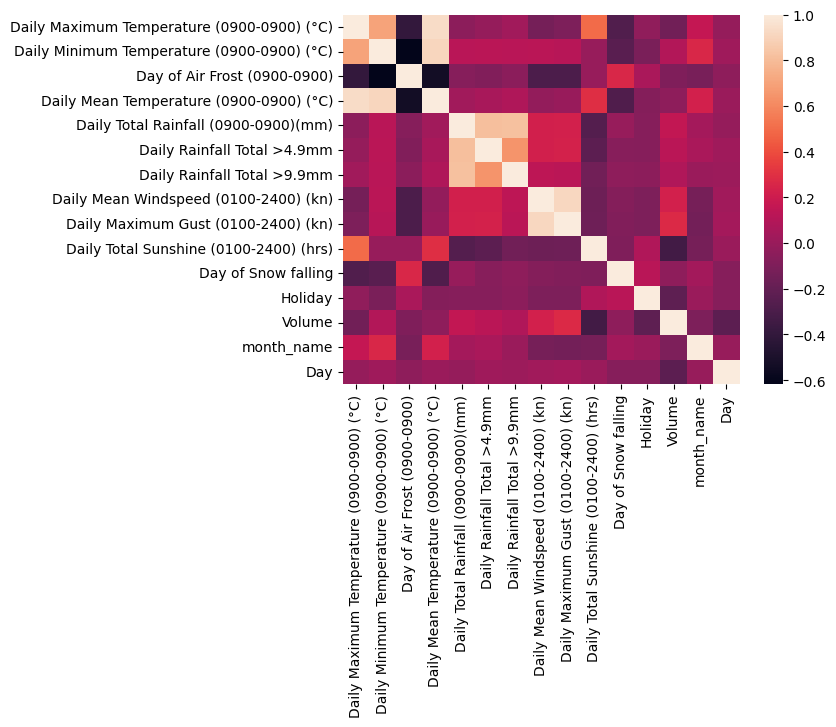

In [ ]:
#Correlation of data using seaborn
correlation3=merged3.corr()
import seaborn
seaborn.heatmap(correlation3)

In [ ]:
corr_matrix =merged3.corr().abs()
corr_matrix.style.background_gradient(cmap="GnBu")

<ipython-input-212-189f23debfa0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix =merged3.corr().abs()


,Daily Maximum Temperature (0900-0900) (°C),Daily Minimum Temperature (0900-0900) (°C),Day of Air Frost (0900-0900),Daily Mean Temperature (0900-0900) (°C),Daily Total Rainfall (0900-0900)(mm),Daily Rainfall Total >4.9mm,Daily Rainfall Total >9.9mm,Daily Mean Windspeed (0100-2400) (kn),Daily Maximum Gust (0100-2400) (kn),Daily Total Sunshine (0100-2400) (hrs),Day of Snow falling,Holiday,Volume,month_name,Day
Daily Maximum Temperature (0900-0900) (°C),1.000000,0.702169,0.398624,0.936794,0.043556,0.014435,0.032739,0.134422,0.101044,0.496557,0.274529,0.032248,0.144157,0.162345,0.012206
Daily Minimum Temperature (0900-0900) (°C),0.702169,1.000000,0.617506,0.906880,0.116167,0.126252,0.118828,0.121868,0.113521,0.005689,0.238733,0.114951,0.093083,0.258423,0.025715
Day of Air Frost (0900-0900),0.398624,0.617506,1.000000,0.539445,0.071608,0.089564,0.053495,0.291232,0.291424,0.009618,0.256158,0.061383,0.099349,0.124078,0.041703
Daily Mean Temperature (0900-0900) (°C),0.936794,0.906880,0.539445,1.000000,0.031068,0.053642,0.077584,0.019536,0.003960,0.291258,0.280695,0.075610,0.039562,0.223088,0.005366
Daily Total Rainfall (0900-0900)(mm),0.043556,0.116167,0.071608,0.031068,1.000000,0.815245,0.820400,0.220694,0.227920,0.262068,0.009901,0.070634,0.153584,0.041642,0.013850
Daily Rainfall Total >4.9mm,0.014435,0.126252,0.089564,0.053642,0.815245,1.000000,0.643228,0.218900,0.231435,0.231655,0.065861,0.070504,0.127165,0.059190,0.023058
Daily Rainfall Total >9.9mm,0.032739,0.118828,0.053495,0.077584,0.820400,0.643228,1.000000,0.136949,0.128045,0.144395,0.042364,0.045350,0.089616,0.006060,0.013644
Daily Mean Windspeed (0100-2400) (kn),0.134422,0.121868,0.291232,0.019536,0.220694,0.218900,0.136949,1.000000,0.916493,0.167557,0.074284,0.103686,0.225177,0.125686,0.032377
Daily Maximum Gust (0100-2400) (kn),0.101044,0.113521,0.291424,0.003960,0.227920,0.231435,0.128045,0.916493,1.000000,0.158200,0.089703,0.099847,0.268041,0.138519,0.040068
Daily Total Sunshine (0100-2400) (hrs),0.496557,0.005689,0.009618,0.291258,0.262068,0.231655,0.144395,0.167557,0.158200,1.000000,0.097728,0.090077,0.339077,0.126054,0.002150


In [ ]:
merged3['Day'].unique()

array([0.66666667, 0.83333333, 1.        , 0.        , 0.16666667,
       0.33333333, 0.5       ])

In [ ]:
X3 = merged3.drop(['Volume', 'Date'], axis=1)
y3= merged3['Volume']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [ ]:

rf_regressor3 = RandomForestRegressor(n_estimators=300, max_depth=20, max_leaf_nodes=30, random_state=42)
#(n_estimators=1000, random_state=42, max_depth=6,max_leaf_nodes=6)
#n_estimators=1000, random_state=42, max_depth=20, max_leaf_nodes=30)

In [ ]:
rfm3=rf_regressor3.fit(X_train, y_train)


In [ ]:
y_pred=rf_regressor3.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print('r2 score is: ', r2)

Mean Squared Error: 0.013060167242146177
Mean Absolute Error: 0.08019488542279303
r2 score is:  0.7455828686292929


In [ ]:
#using Cross validation for random forest
rf_regressor3 = RandomForestRegressor(n_estimators=300, random_state=42, max_depth=20, max_leaf_nodes=30)
#(n_estimators=1000, random_state=42, max_depth=6,max_leaf_nodes=6)

In [ ]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

In [ ]:

scores= cross_val_score(rf_regressor3, X3, y3, cv=kfold, scoring='neg_mean_squared_error')
r2_scores=cross_val_score(rf_regressor3, X3, y3, cv=kfold,scoring='r2')

In [ ]:

mean_mse= -scores.mean()
std_mse=scores.std()
mean_r2=r2_scores.mean()
print('Mean MSE: ', mean_mse)
print("Standard Deviation of MSE: ", std_mse)
print("R^2 for each fold: ", r2_scores)
print("Mean R^2 score: ", mean_r2)


Mean MSE:  0.013013026740292869
Standard Deviation of MSE:  0.0015106289974730687
R^2 for each fold:  [0.73364042 0.70657368 0.70929651 0.78486857 0.69652505]
Mean R^2 score:  0.7261808479579219


In [ ]:
!pip install tensorflow
!pip install shap
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.2 MB/s eta 0:00:00


In [ ]:
#SHAP ANALYSIS ON RANDOM FOREST
import shap

ModuleNotFoundError: ignored

In [ ]:
#Create train/split validation split
Xt, Xv, yt, yv = train_test_split(X3, y3 , test_size=0.2, random_state=10)

In [ ]:
explainer = shap.TreeExplainer(rfm3)
shap_values = explainer.shap_values(Xv)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


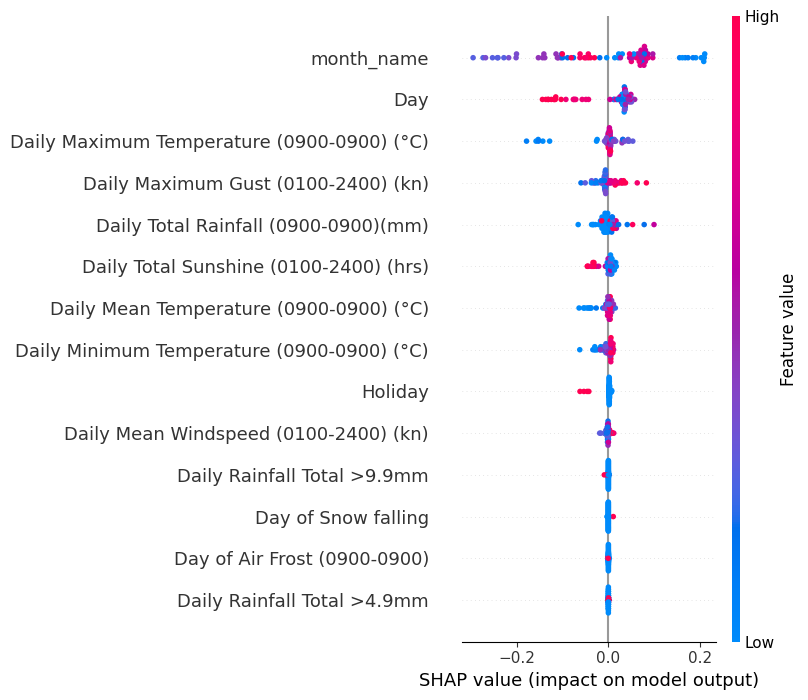

In [ ]:
shap.summary_plot(shap_values, Xv)

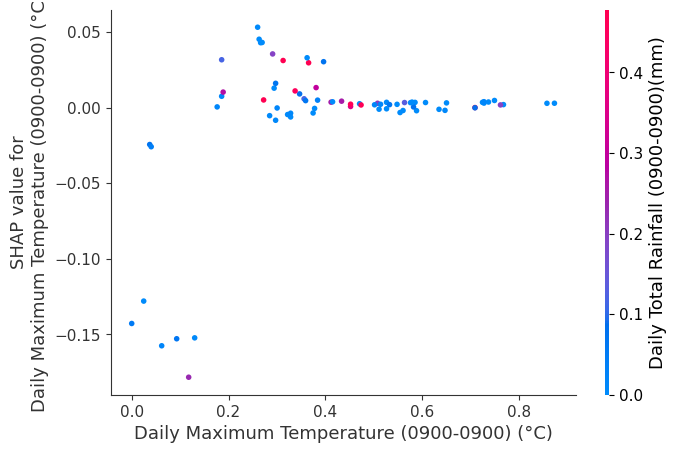

In [ ]:
shap.dependence_plot("Daily Maximum Temperature (0900-0900) (°C)", shap_values, Xv, interaction_index="Daily Total Rainfall (0900-0900)(mm)")

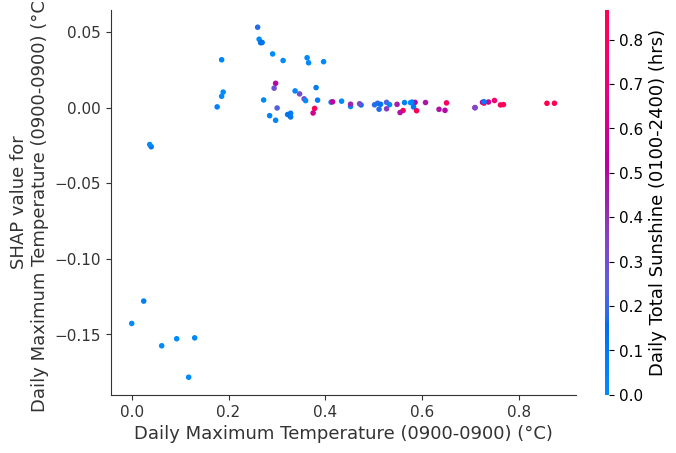

In [ ]:
shap.dependence_plot("Daily Maximum Temperature (0900-0900) (°C)", shap_values, Xv, interaction_index="Daily Total Sunshine (0100-2400) (hrs)")

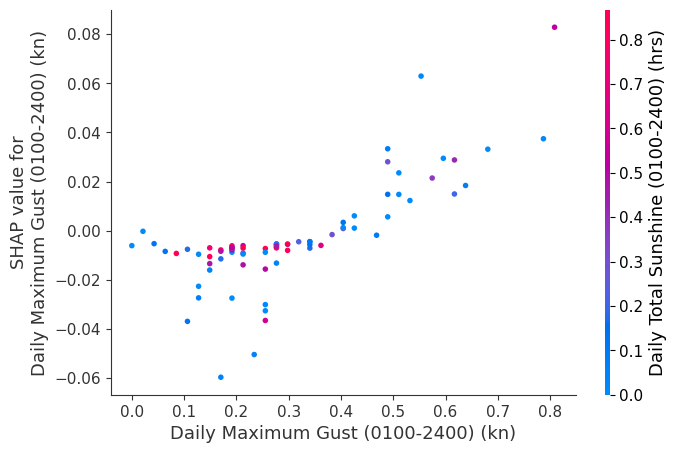

In [ ]:
shap.dependence_plot("Daily Maximum Gust (0100-2400) (kn)", shap_values, Xv, interaction_index="Daily Total Sunshine (0100-2400) (hrs)")

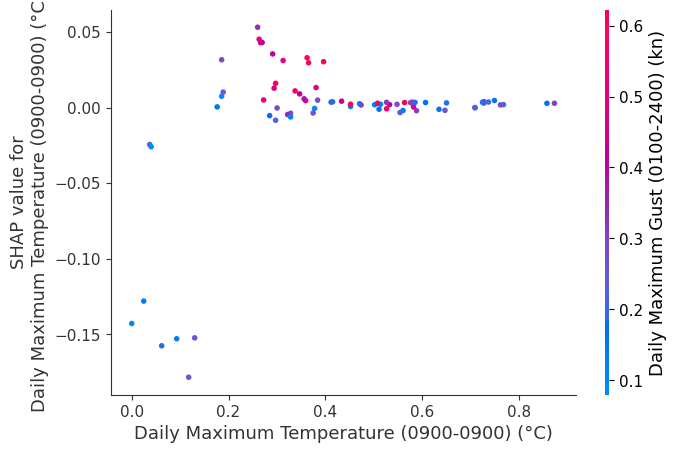

In [ ]:
shap.dependence_plot("Daily Maximum Temperature (0900-0900) (°C)", shap_values, Xv, interaction_index="Daily Maximum Gust (0100-2400) (kn)")

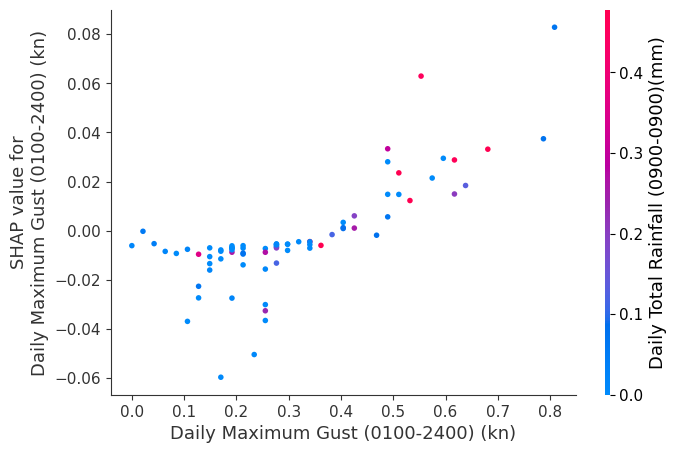

In [ ]:
shap.dependence_plot("Daily Maximum Gust (0100-2400) (kn)", shap_values, Xv, interaction_index="Daily Total Rainfall (0900-0900)(mm)")

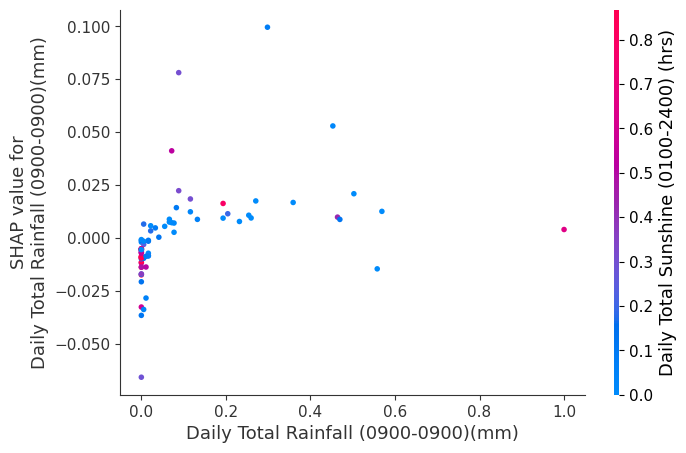

In [ ]:
shap.dependence_plot("Daily Total Rainfall (0900-0900)(mm)", shap_values, Xv, interaction_index="Daily Total Sunshine (0100-2400) (hrs)")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
parameters = {
            'colsample_bytree':[1.0,0.9],
            'gamma':[0,0.03,0.1,0.3],
            'min_child_weight':[1.0,1.5,6,10],
            'learning_rate':[0.3,0.1,0.07,0.01],
            'max_depth':[3,5,8,10],
            'n_estimators':[10000,5000],
            'reg_alpha':[1e-5, 1e-2,  0.75],
            'reg_lambda':[1e-5, 1e-2, 0.45],
            'subsample':[0.8,0.95]  }

In [ ]:
#fITTING xgbOOST ON MERGED 3 WHERE THE MONTHS AND DAY HAVE BEEN COMPRESSED
#Lets now fit a XGBOOST model to all the data we have
xgb_new = XGBRegressor()
gsearch_new = RandomizedSearchCV(estimator=xgb_new, param_distributions=parameters, n_iter=30, scoring='neg_mean_squared_error', cv=5)
training_features_new = X3

In [ ]:
gsearch_new.fit(np.array(training_features_new), np.array(y3))
colsample_bytree_best=gsearch_new.best_params_['colsample_bytree']
gamma_best=gsearch_new.best_params_['gamma']
min_child_weight_best=gsearch_new.best_params_['min_child_weight']
learning_rate_best=gsearch_new.best_params_['learning_rate']
max_depth_best=gsearch_new.best_params_['max_depth']
n_estimators_best=gsearch_new.best_params_['n_estimators']
reg_alpha_best=gsearch_new.best_params_['reg_alpha']
reg_lambda_best=gsearch_new.best_params_['reg_lambda']
subsample_best=gsearch_new.best_params_['subsample']
best_xgb_model_new = XGBRegressor(colsample_bytree=colsample_bytree_best,gamma=gamma_best,learning_rate=learning_rate_best,max_depth=max_depth_best,min_child_weight=min_child_weight_best,n_estimators=n_estimators_best,reg_alpha=reg_alpha_best,reg_lambda=reg_lambda_best,subsample=subsample_best,seed=42)
xgbest3=best_xgb_model_new.fit(np.array(training_features_new), np.array(y3))

In [ ]:
print ('the best parameters for these are: ', colsample_bytree_best, ' ', gamma_best, ' ', min_child_weight_best, ' ', learning_rate_best, ' ', max_depth_best, ' ', n_estimators_best, ' ', reg_alpha_best, ' ', reg_lambda_best, ' ', subsample_best, ' ' )

the best parameters for these are:  0.9   0.1   1.0   0.3   5   5000   1e-05   0.45   0.8  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
y_pred = best_xgb_model_new.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute error: ", mae)
print("R-squared score:", r2)

Mean Squared Error: 0.0051163814680112935
Mean Absolute error:  0.053980390034489255
R-squared score: 0.9003309014383055


In [ ]:
#using validation from cross validation
xgb_test = best_xgb_model_new

In [ ]:
scores= cross_val_score(xgb_test, X3, y3, cv=kfold, scoring='neg_mean_squared_error')
r2_scores=cross_val_score(xgb_test, X3, y3, cv=kfold,scoring='r2')

In [ ]:

mean_mse= -scores.mean()
std_mse=scores.std()
mean_r2=r2_scores.mean()
print('Mean MSE: ', mean_mse)
print("Standard Deviation of MSE: ", std_mse)
print("R^2 for each fold: ", r2_scores)
print("Mean R^2 score: ", mean_r2)

Mean MSE:  0.011344531176700302
Standard Deviation of MSE:  0.0016044951330679111
R^2 for each fold:  [0.76182358 0.71977469 0.79566131 0.8036721  0.72533615]
Mean R^2 score:  0.7612535665351562


In [ ]:
import shap

This shap analysis is for XGBooster for the merged 3  version!

In [ ]:
#Create train/split validation split
Xt, Xv, yt, yv = train_test_split(X3, y3 , test_size=0.2, random_state=10)


In [ ]:
explainer = shap.TreeExplainer(xgbest3)
shap_values = explainer.shap_values(Xv)

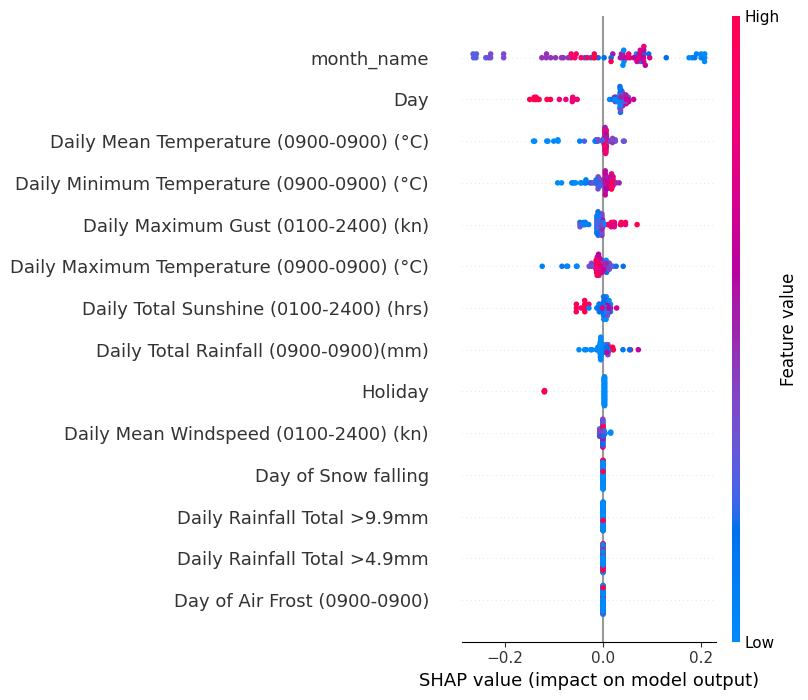

In [ ]:
shap.summary_plot(shap_values, Xv)

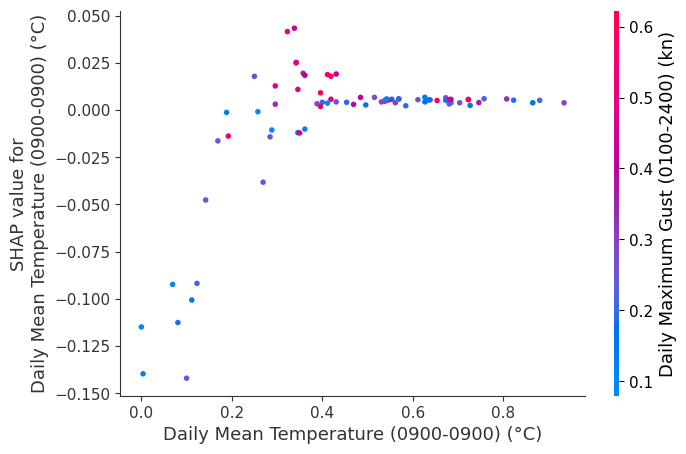

In [ ]:
shap.dependence_plot("Daily Mean Temperature (0900-0900) (°C)", shap_values, Xv, interaction_index="Daily Maximum Gust (0100-2400) (kn)")

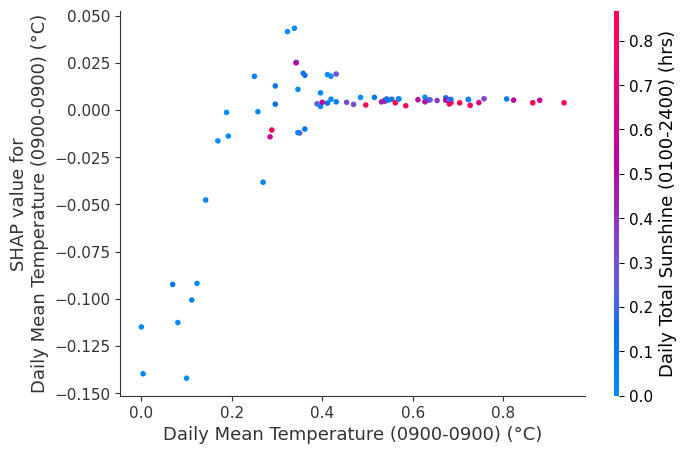

In [ ]:
shap.dependence_plot("Daily Mean Temperature (0900-0900) (°C)", shap_values, Xv, interaction_index="Daily Total Sunshine (0100-2400) (hrs)")

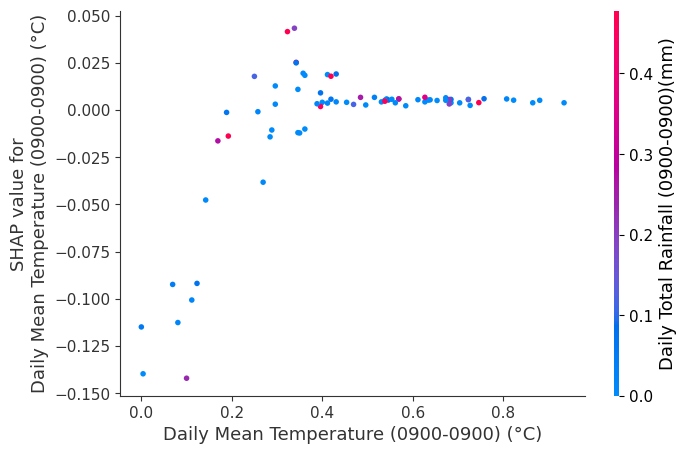

In [ ]:
shap.dependence_plot("Daily Mean Temperature (0900-0900) (°C)", shap_values, Xv, interaction_index="Daily Total Rainfall (0900-0900)(mm)")

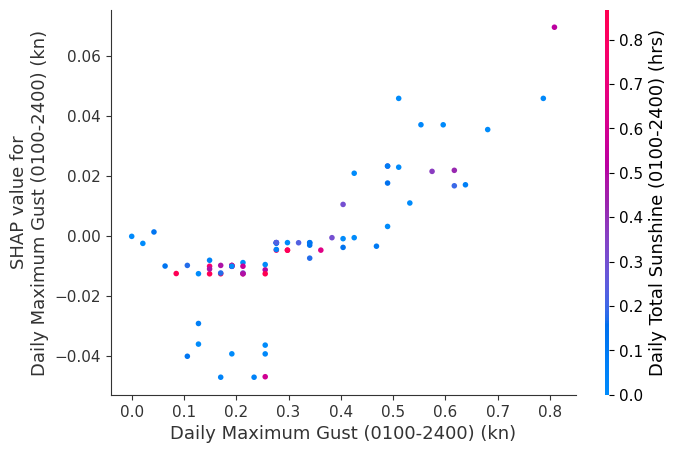

In [ ]:
shap.dependence_plot("Daily Maximum Gust (0100-2400) (kn)", shap_values, Xv, interaction_index="Daily Total Sunshine (0100-2400) (hrs)")

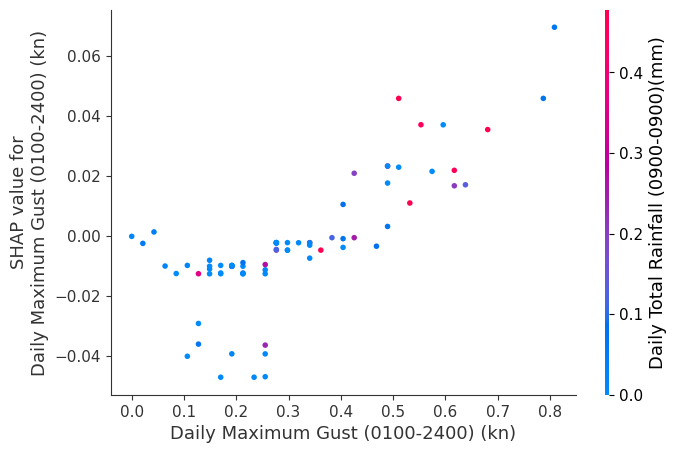

In [ ]:
shap.dependence_plot("Daily Maximum Gust (0100-2400) (kn)", shap_values, Xv, interaction_index="Daily Total Rainfall (0900-0900)(mm)")

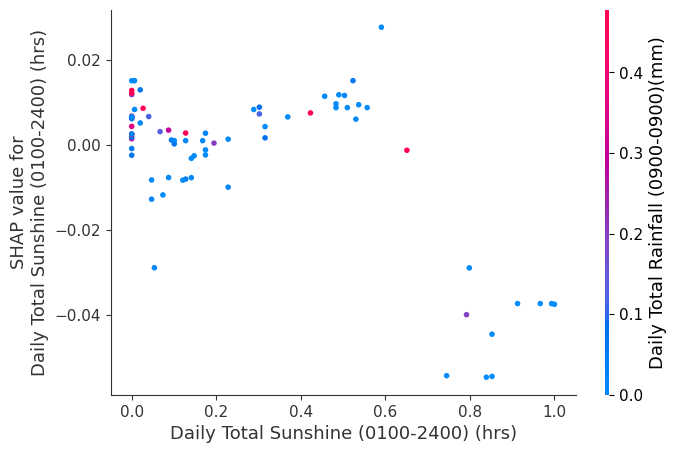

In [ ]:
shap.dependence_plot("Daily Total Sunshine (0100-2400) (hrs)", shap_values, Xv, interaction_index="Daily Total Rainfall (0900-0900)(mm)")